# Lending Club Case Study

## Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
 
Like most other lending companies, lending loans to **‘risky’** applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who **default** cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 
 
If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.
 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

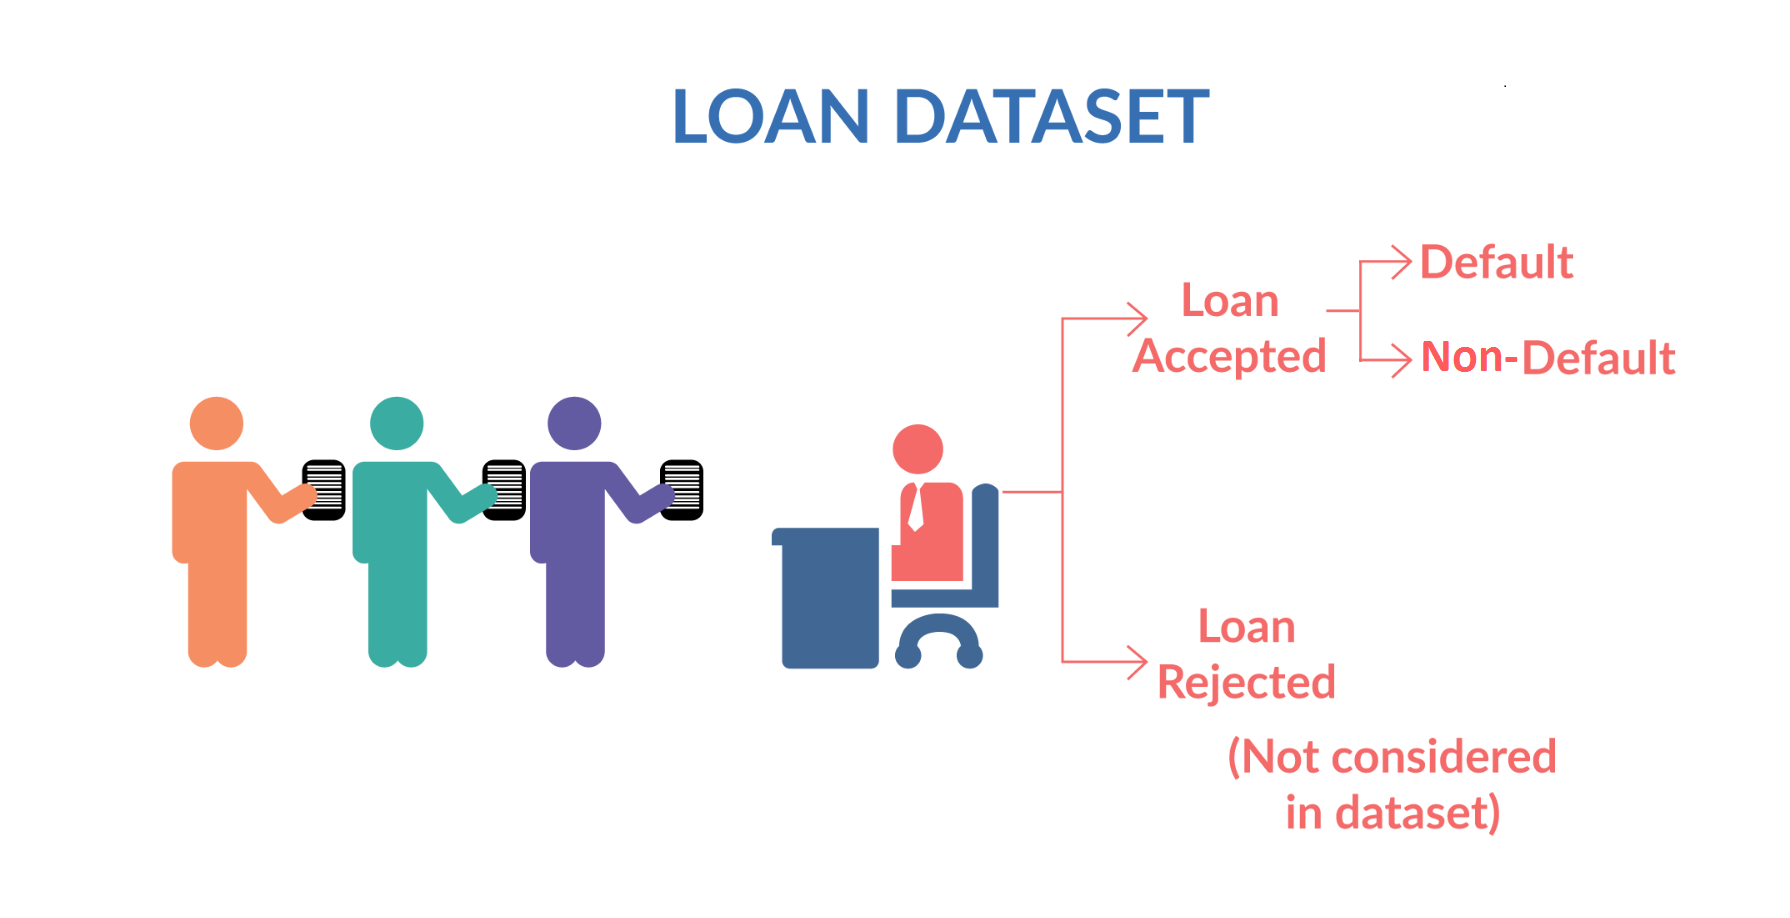


## Load all the python libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

## Load the dataset and do initial inspection of the data

In [4]:
dfLoan = pd.read_csv('loan.csv',low_memory=False)
dfLoan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [67]:
dfLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [68]:
dfLoan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [69]:
dfLoan.shape

(39717, 111)

In [70]:
dfLoan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [71]:
dfLoan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data cleaning started
### Let's delete empty columns 
 * tot_hi_cred_lim
 * total_bal_ex_mort
 * total_bc_limit
 * total_il_high_credit_limit


and identify any other columns and delete them as well

In [8]:
dfLoan['emp_length'] = dfLoan['emp_length'].replace(' years','',regex=True)
dfLoan['emp_length'] = dfLoan['emp_length'].replace(' year','',regex=True)
dfLoan['emp_length'] = dfLoan['emp_length'].replace('\+','',regex=True)
dfLoan['emp_length'] = dfLoan['emp_length'].replace("< 1","0",regex=False)

In [11]:
dfLoan['revol_util'] = dfLoan['revol_util'].replace('%', '', regex = True).astype(float)

### filling emp length missing values with median value

In [13]:
filtered_loan = dfLoan[~dfLoan['emp_length'].isna()]
filtered_loan['emp_length'] = filtered_loan['emp_length'].apply(lambda x: int(x))
print(filtered_loan['emp_length'].describe())
dfLoan[dfLoan['emp_length'].isna()]['emp_length'] = 4
dfLoan['emp_length'] = dfLoan['emp_length'].fillna(4).astype(int)
print(dfLoan['emp_length'].describe())

count    38642.000000
mean         4.973449
std          3.562580
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64
count    39717.000000
mean         4.947101
std          3.517584
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


C:\Users\Anshul\AppData\Local\Temp\ipykernel_9148\4131229241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan['emp_length'] = filtered_loan['emp_length'].apply(lambda x: int(x))
C:\Users\Anshul\AppData\Local\Temp\ipykernel_9148\4131229241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfLoan[dfLoan['emp_length'].isna()]['emp_length'] = 4


In [9]:
dfLoan1= dfLoan.dropna(how='all',axis=1)
dfLoan1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [128]:
dfLoan1.shape

(39717, 57)

### Checking columns with a lot of missing values to see if we need them or not. 

### replacing na values of mths_since_last_delinq column with 0 assuming there is no delinquency for whom data is not available. Also, converting to int post that


In [10]:
dfLoan1.mths_since_last_delinq.value_counts()

dfLoan1['mths_since_last_delinq'] = dfLoan1['mths_since_last_delinq'].fillna(0)
print(dfLoan1[~((dfLoan1['mths_since_last_delinq'].isna()) | (dfLoan1['mths_since_last_delinq']==0.0))]['loan_status'].value_counts())
dfLoan1['mths_since_last_delinq'] = dfLoan1['mths_since_last_delinq'].astype(int)
print(dfLoan1['mths_since_last_delinq'].value_counts())

loan_status
Fully Paid     11154
Charged Off     2075
Current          363
Name: count, dtype: int64
mths_since_last_delinq
0      26125
15       252
30       247
23       247
24       241
       ...  
89         1
107        1
85         1
97         1
95         1
Name: count, Length: 95, dtype: int64


C:\Users\Anshul\AppData\Local\Temp\ipykernel_9148\584586242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfLoan1['mths_since_last_delinq'] = dfLoan1['mths_since_last_delinq'].fillna(0)
C:\Users\Anshul\AppData\Local\Temp\ipykernel_9148\584586242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfLoan1['mths_since_last_delinq'] = dfLoan1['mths_since_last_delinq'].astype(int)


In [130]:
dfLoan1.mths_since_last_record.value_counts()

mths_since_last_record
0.0      670
104.0     61
89.0      60
113.0     59
111.0     57
        ... 
19.0       1
20.0       1
120.0      1
129.0      1
5.0        1
Name: count, Length: 111, dtype: int64

In [131]:
dfLoan1.next_pymnt_d.value_counts()

next_pymnt_d
Jun-16    1125
Jul-16      15
Name: count, dtype: int64

Since more than 50% of the rows hace missing values on those columns it is **recommended to drop those columns** 

In [132]:
dfLoan1 = dfLoan1.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1)
dfLoan1.shape

(39717, 54)

In [133]:
dfLoan1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### check all the additional columns using data dictionary and remove them as neccessary

The following columns will be tested for relevance. 

* id
* member_id
* desc
* title
* url

etc.. 

In [79]:
dfLoan1.id.value_counts()

id
1077501    1
568534     1
568659     1
567165     1
568531     1
          ..
785667     1
785659     1
785630     1
785626     1
87023      1
Name: count, Length: 39717, dtype: int64

**Since it contains unique values for each row. We can drop this column**

In [80]:
dfLoan1.member_id.value_counts()

member_id
1296599    1
731393     1
731544     1
729629     1
731390     1
          ..
989001     1
988993     1
988959     1
988954     1
86999      1
Name: count, Length: 39717, dtype: int64

**Since it contains unique values for each row. We can drop this column**

In [81]:
dfLoan1.title.value_counts()

title
Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: count, Length: 19615, dtype: int64

lets check top 20 records

In [82]:
dfLoan1.title.value_counts().head(20)

title
Debt Consolidation           2184
Debt Consolidation Loan      1729
Personal Loan                 659
Consolidation                 517
debt consolidation            505
Home Improvement              356
Credit Card Consolidation     356
Debt consolidation            334
Small Business Loan           328
Credit Card Loan              317
Personal                      308
Consolidation Loan            255
Home Improvement Loan         247
personal loan                 234
personal                      220
Loan                          213
Wedding Loan                  208
consolidation                 205
Car Loan                      204
Other Loan                    191
Name: count, dtype: int64

check bottom 20 records

In [83]:
dfLoan1.title.value_counts().tail(20)

title
Debt consolidation at lower rate     1
Major Credit Card Consolidation      1
Darren's Car                         1
Property settelment                  1
personal need                        1
Cheryce's Loan                       1
erase credit cards                   1
Needed Money                         1
Laura's Debt Freedom Plan            1
Move Expense                         1
Stav                                 1
Florida Vacation 2011                1
Ninja zx6                            1
Pay off Masters Degree               1
CREDIT CARD CONSOLIDATION LOAN 01    1
your rate is better than my rate     1
Concession Trailer                   1
gregs                                1
EZover                               1
JAL Loan                             1
Name: count, dtype: int64

The descriptions looks repeating. For example
* Debt Consolidation
* Debt Consolidation Loan
* Consolidation
* debt consolidation
* Debt consolidation at lower rate

all looks same. **for the purpose of ease we would drop this column**

In [84]:
dfLoan1.desc.value_counts()

desc
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           210
Debt Consolidation                                                                                                                                                                  

**This looks like arbitrary texts. We should drop this column as well.** 

In [85]:
dfLoan1.emp_title.value_counts()

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

**The value looks pretty diverse and random. We should drop this column as well**

In [86]:
dfLoan1.url.value_counts()

url
https://lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://lendingclub.com/browse/loanDetail.action?loan_id=568534     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=567165     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568531     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=785667     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785630     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785626     1
https://lendingclub.com/browse/loanDetail.action?loan_id=87023      1
Name: count, Length: 39717, dtype: int64

**All rows are unique. This column should be dropped too**

In [87]:
dfLoan1.issue_d.value_counts()

issue_d
Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Jul-11    1870
Jun-11    1827
May-11    1689
Apr-11    1562
Mar-11    1443
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

**The columns contains a lot of repeated values. We should _keep_ this column**

In [88]:
dfLoan1.purpose.value_counts()

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64

**The columns contains a lot of repeated values. We should _keep_ this column**

In [89]:
dfLoan1.zip_code.value_counts()

zip_code
100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: count, Length: 823, dtype: int64

**The columns contains a lot of repeated values.Though we should not use PII like zip code. But since the value is anonymized. We should _keep_ this column**

In [90]:
dfLoan1.pub_rec.value_counts()

pub_rec
0    37601
1     2056
2       51
3        7
4        2
Name: count, dtype: int64

**The columns contains a lot of repeated values. We should _keep_ this column**

In [91]:
dfLoan1.chargeoff_within_12_mths.value_counts()

chargeoff_within_12_mths
0.0    39661
Name: count, dtype: int64

**The columns contains only a single value. This need to be dropped**

In [92]:
dfLoan1.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [93]:
dfLoan1.last_pymnt_d.value_counts()

last_pymnt_d
May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: count, Length: 101, dtype: int64

In [94]:
dfLoan1.pymnt_plan.value_counts()

pymnt_plan
n    39717
Name: count, dtype: int64

**This column has only 1 value. Drop this column**

In [95]:
dfLoan1.funded_amnt.value_counts()

funded_amnt
10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: count, Length: 1041, dtype: int64

In [96]:
dfLoan1.funded_amnt_inv.value_counts()

funded_amnt_inv
5000.000000     1309
10000.000000    1275
6000.000000     1200
12000.000000    1069
8000.000000      900
                ... 
4944.213109        1
18400.281660       1
14659.820000       1
6294.151315        1
11808.924370       1
Name: count, Length: 8205, dtype: int64

In [97]:
dfLoan1.term.value_counts()

term
 36 months    29096
 60 months    10621
Name: count, dtype: int64

### So the identifed columns to drop are 

* id
* member_id
* desc
* title
* emp_title
* url
* pymnt_plan
* chargeoff_within_12_mths


In [134]:
dfLoan1 = dfLoan1.drop(['id','member_id','desc','title','emp_title','url','pymnt_plan','chargeoff_within_12_mths'],axis=1)
dfLoan1.shape

(39717, 46)

In [99]:
dfLoan1.isnull().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
purpose                          0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      50
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv       

### Lets check all other columns 

In [135]:
for c in dfLoan1.columns:
    print("=============================================")
    print(c)
    print("---------------------------------------------")
    print(dfLoan1[c].value_counts())
    print("=============================================")

loan_amnt
---------------------------------------------
loan_amnt
10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: count, Length: 885, dtype: int64
funded_amnt
---------------------------------------------
funded_amnt
10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: count, Length: 1041, dtype: int64
funded_amnt_inv
---------------------------------------------
funded_amnt_inv
5000.000000     1309
10000.000000    1275
6000.000000     1200
12000.000000    1069
8000.000000      900
                ... 
4944.213109        1
18400.281660       1
14659.820000       1
6294.151315        1
11808.924370       1
Name: count, Length: 8205, dtype: int64
term
---------------------------------------------
term
 36 months    29096
 60 months    10621
Name: count, dtype: int64
int_ra

#### The following columns should be dropped
* initial_list_status
* collections_12_mths_ex_med
* policy_code
* application_type
* acc_now_delinq
* delinq_amnt
* tax_liens

**These columns contains only a single value**

In [136]:
dfLoan1 = dfLoan1.drop(['initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','delinq_amnt','tax_liens'],axis=1)
dfLoan1.shape

(39717, 39)

In [137]:
dfLoan1.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_re

In [138]:
for c in dfLoan1.columns:
    print("=============================================")
    print(c)
    print("---------------------------------------------")
    print(dfLoan1[c].value_counts())
print("=============================================")

loan_amnt
---------------------------------------------
loan_amnt
10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: count, Length: 885, dtype: int64
funded_amnt
---------------------------------------------
funded_amnt
10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: count, Length: 1041, dtype: int64
funded_amnt_inv
---------------------------------------------
funded_amnt_inv
5000.000000     1309
10000.000000    1275
6000.000000     1200
12000.000000    1069
8000.000000      900
                ... 
4944.213109        1
18400.281660       1
14659.820000       1
6294.151315        1
11808.924370       1
Name: count, Length: 8205, dtype: int64
term
---------------------------------------------
term
 36 months    29096
 60 months    10621
Name: count, dtype: int64
int_ra

### Drop column completed
Finally we have dropped all columns with either all unique values, all containing same value or all containing random texts

## Data conversion 

We would now check the columns and convert the data as required

In [104]:
dfLoan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

### Remove "%" sign from int_rate and revol_util columns 

In [139]:
dfLoan1['int_rate'] = dfLoan1['int_rate'].replace('%', '', regex = True).astype(float)
dfLoan1['revol_util'] = dfLoan1['revol_util'].replace('%', '', regex = True).astype(float)
dfLoan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  float64
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

### Lets convert the columns with month-year to date type columns 

In [140]:
dfLoan1['issue_dt']=pd.to_datetime(dfLoan1.issue_d,format='%b-%y')

In [141]:
pd.to_datetime(dfLoan1.earliest_cr_line,format='%b-%y').sort_values(ascending=False)

21086   2068-12-01
38068   2068-12-01
32850   2068-11-01
37328   2068-10-01
4426    2068-09-01
           ...    
32778   1969-03-01
19376   1969-03-01
11074   1969-02-01
39690   1969-02-01
34159   1969-02-01
Name: earliest_cr_line, Length: 39717, dtype: datetime64[ns]

**Some of the dates are coming wrong. so let's apply custom function**

In [142]:
from datetime import datetime as dt
def convert_datetime(x):
    new_date = dt.strptime(x, "%b-%y")
    if(new_date.year>dt.now().year):
        return dt(new_date.year-100,new_date.month,new_date.day,0,0,0)
    else:
        return new_date

In [143]:
dfLoan1.earliest_cr_line.apply(convert_datetime).sort_values(ascending=False)

521     2008-11-01
2134    2008-11-01
2960    2008-10-01
6326    2008-09-01
4222    2008-09-01
           ...    
13975   1956-09-01
22031   1954-11-01
6118    1954-10-01
15269   1950-12-01
14077   1946-01-01
Name: earliest_cr_line, Length: 39717, dtype: datetime64[ns]

In [144]:
dfLoan1['earliest_cr_line_dt']=dfLoan1.earliest_cr_line.apply(convert_datetime)

In [145]:
pd.to_datetime(dfLoan1.last_pymnt_d,format='%b-%y').sort_values(ascending=False)

4299    2016-05-01
15428   2016-05-01
15375   2016-05-01
15376   2016-05-01
3343    2016-05-01
           ...    
36185          NaT
36206          NaT
36209          NaT
36937          NaT
37911          NaT
Name: last_pymnt_d, Length: 39717, dtype: datetime64[ns]

In [146]:
dfLoan1.last_pymnt_d.isnull().sum()

71

**since only 71 null values are there. We are keeping them and converting them into datetime**

In [147]:
dfLoan1['last_pymnt_dt']=pd.to_datetime(dfLoan1.last_pymnt_d,format='%b-%y')

In [148]:
pd.to_datetime(dfLoan1.last_credit_pull_d,format='%b-%y').sort_values(ascending=False)

0       2016-05-01
12448   2016-05-01
12409   2016-05-01
31690   2016-05-01
12415   2016-05-01
           ...    
39685   2007-06-01
39650   2007-06-01
39676   2007-05-01
26025          NaT
39476          NaT
Name: last_credit_pull_d, Length: 39717, dtype: datetime64[ns]

In [149]:
dfLoan1.last_credit_pull_d.isnull().sum()

2

**since only 2 null values are there. We are keeping them and converting them into datetime**

In [150]:
dfLoan1['last_credit_pull_dt']=pd.to_datetime(dfLoan1.last_credit_pull_d,format='%b-%y')

In [117]:
dfLoan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                39717 non-null  int64         
 1   funded_amnt              39717 non-null  int64         
 2   funded_amnt_inv          39717 non-null  float64       
 3   term                     39717 non-null  object        
 4   int_rate                 39717 non-null  float64       
 5   installment              39717 non-null  float64       
 6   grade                    39717 non-null  object        
 7   sub_grade                39717 non-null  object        
 8   emp_length               38642 non-null  object        
 9   home_ownership           39717 non-null  object        
 10  annual_inc               39717 non-null  float64       
 11  verification_status      39717 non-null  object        
 12  issue_d                  39717 n

### drop older dates columns
since we have already converted the dates now let's drop the older columns and create a new dataset with that

In [15]:
dfLoan2=dfLoan1.drop(['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d'],axis=1)
dfLoan2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,NaN,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,NaN,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,NaN,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,NaN,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Jun-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [119]:
dfLoan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                39717 non-null  int64         
 1   funded_amnt              39717 non-null  int64         
 2   funded_amnt_inv          39717 non-null  float64       
 3   term                     39717 non-null  object        
 4   int_rate                 39717 non-null  float64       
 5   installment              39717 non-null  float64       
 6   grade                    39717 non-null  object        
 7   sub_grade                39717 non-null  object        
 8   emp_length               38642 non-null  object        
 9   home_ownership           39717 non-null  object        
 10  annual_inc               39717 non-null  float64       
 11  verification_status      39717 non-null  object        
 12  loan_status              39717 n

**Let's check what is the current null values available in the columns**

In [152]:
dfLoan2.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveri

## Take subset data for defaulted loans and do univariate analysis

Now we take the loans which are already defaulted and do an univariate analysis on all the columns 

In [154]:
dfLoanDefaulted=dfLoan2[dfLoan2.loan_status=='Charged Off']
dfLoanDefaulted.shape

(5627, 39)

**Importing seaborn and making graph inline**

In [155]:
import seaborn as sns
%matplotlib inline

In [156]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

## Let's check the data distribution for all defaulted loans

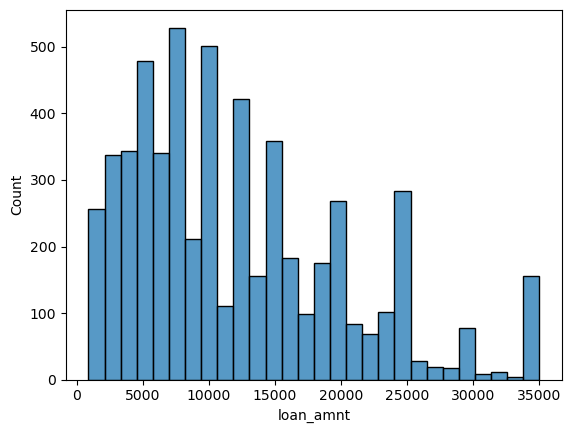

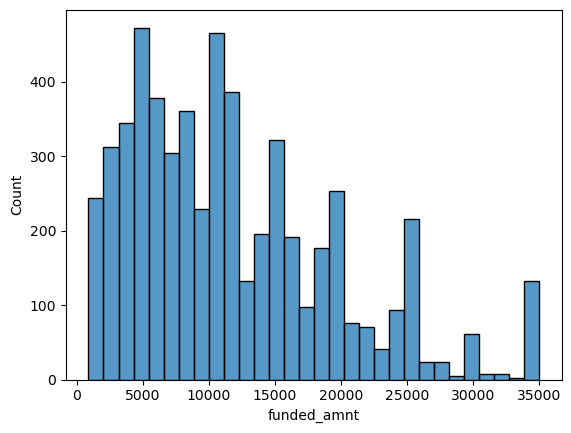

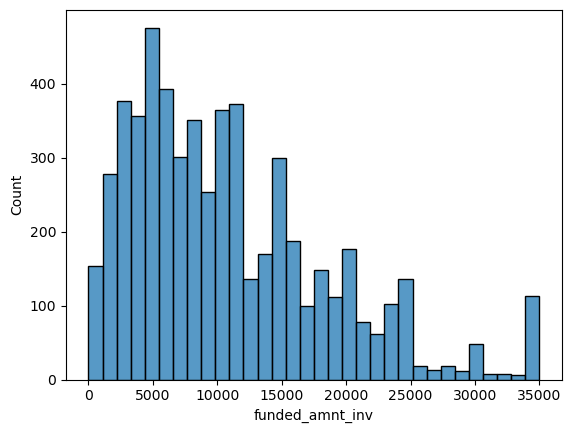

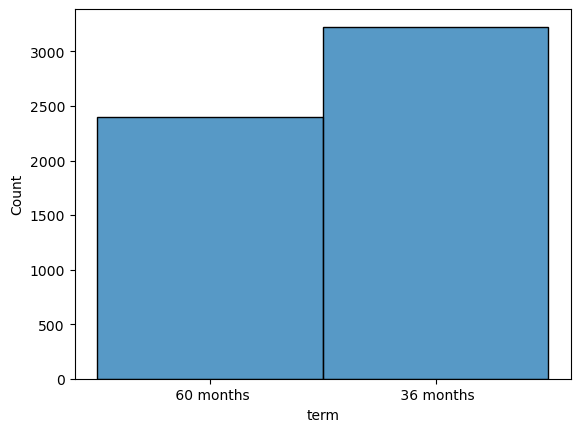

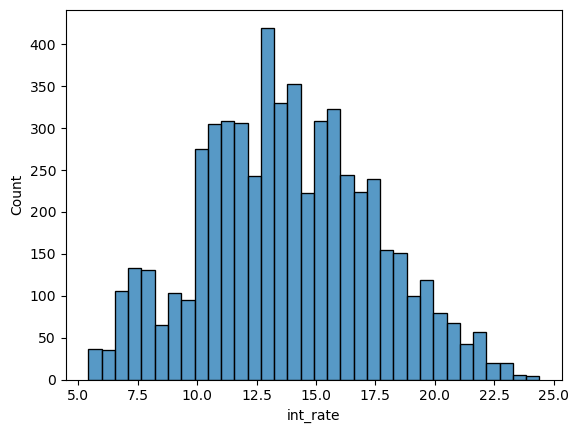

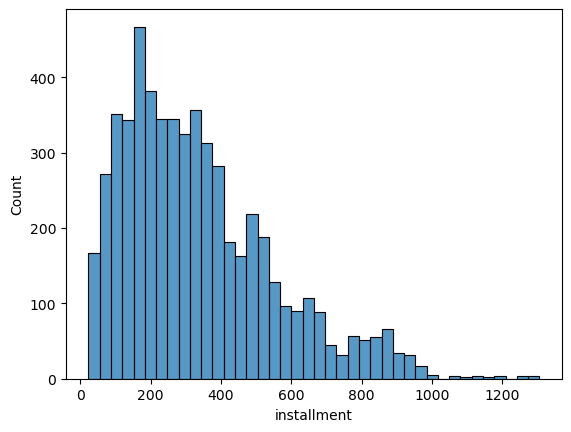

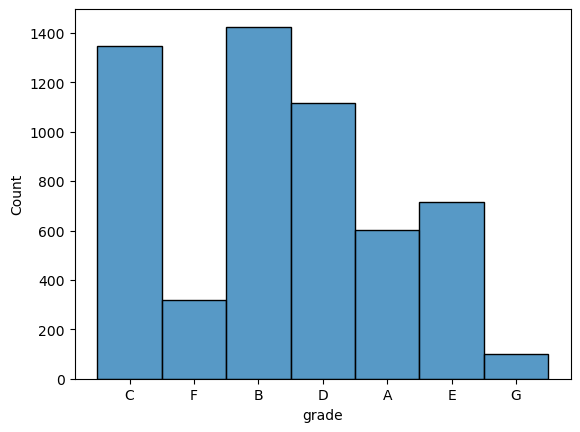

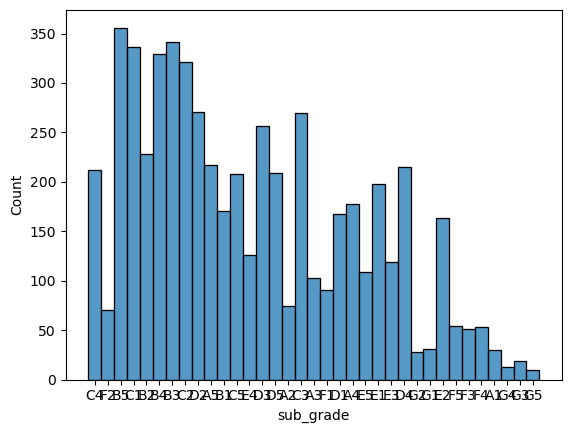

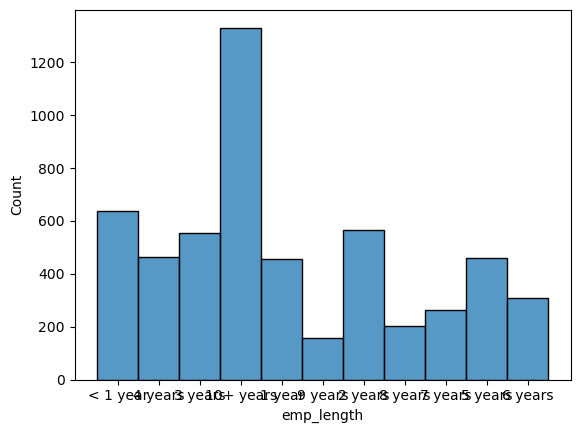

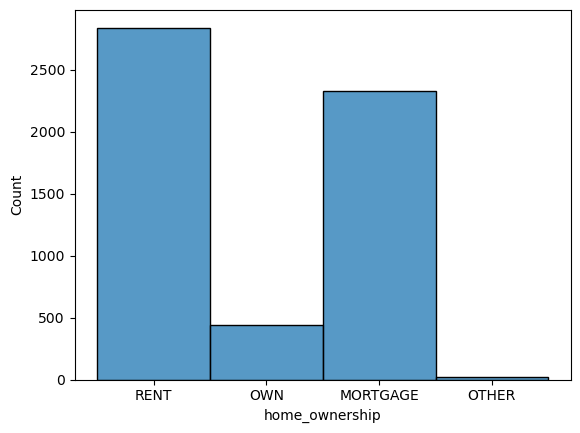

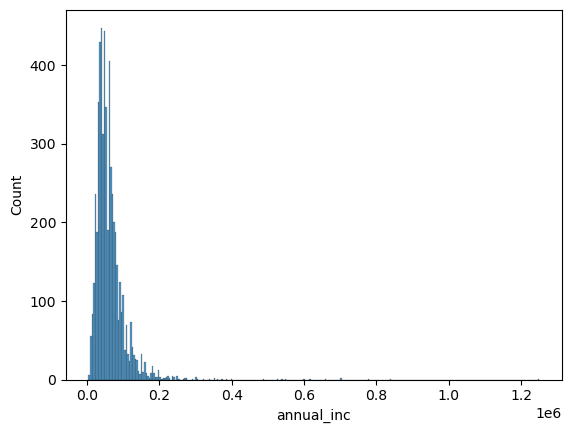

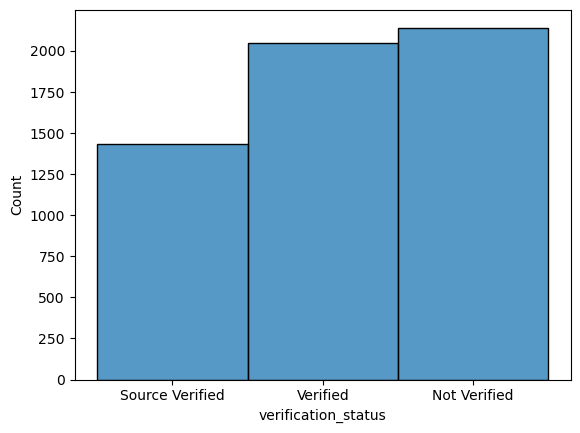

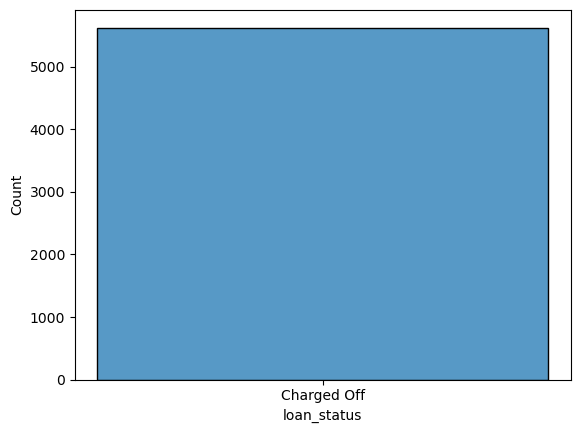

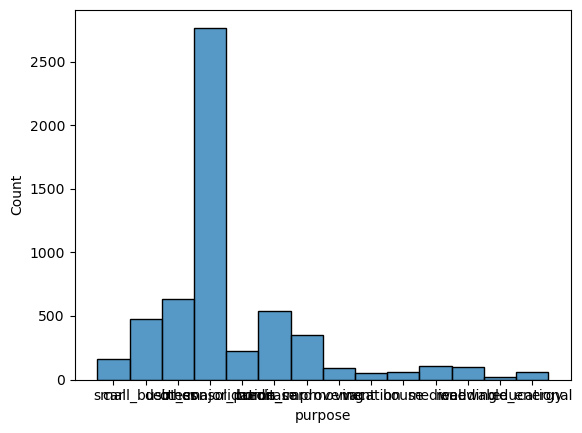

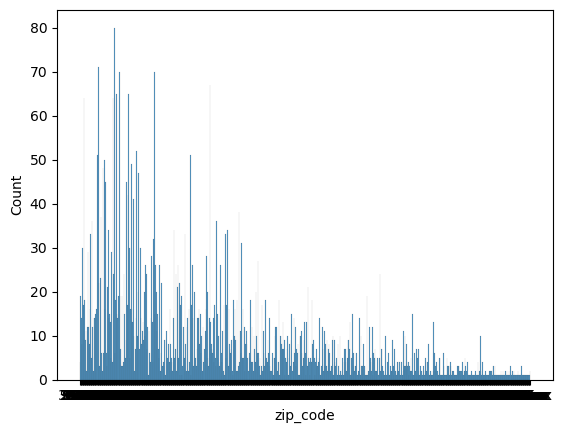

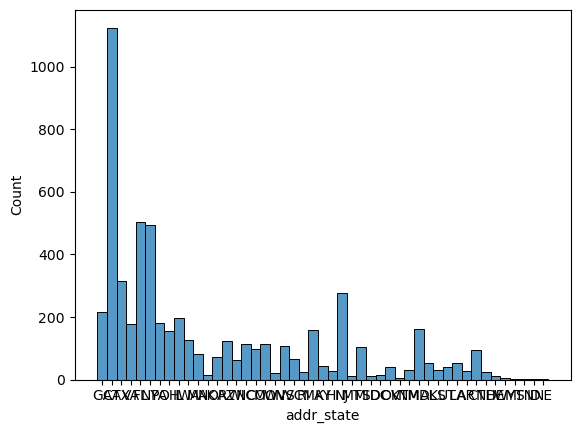

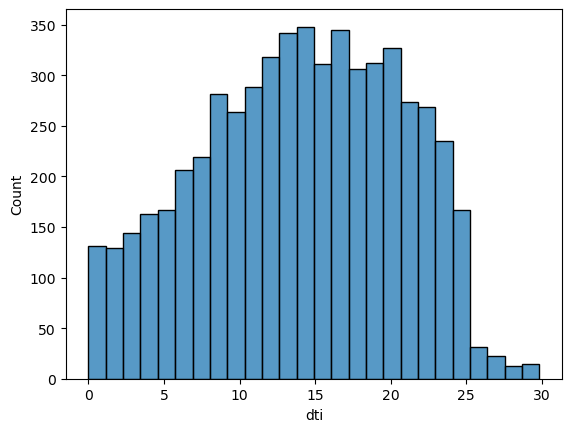

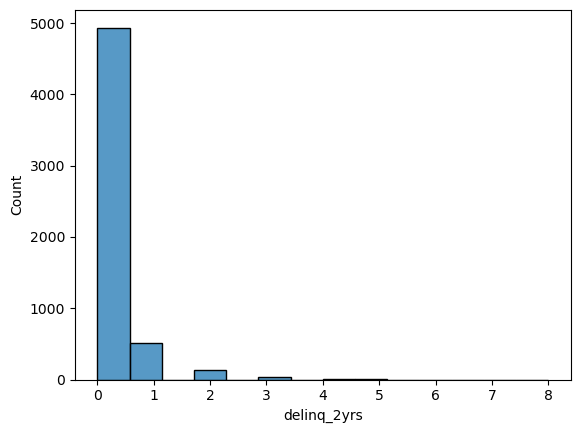

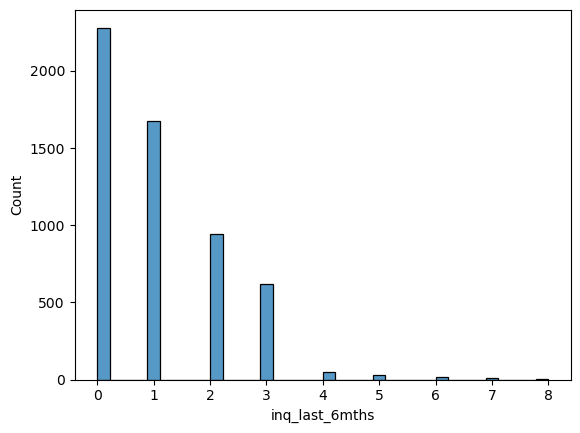

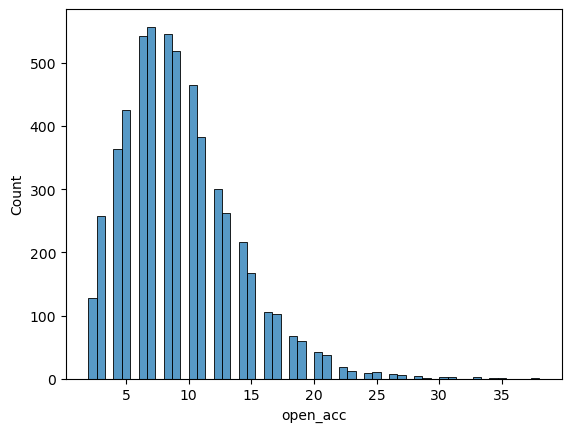

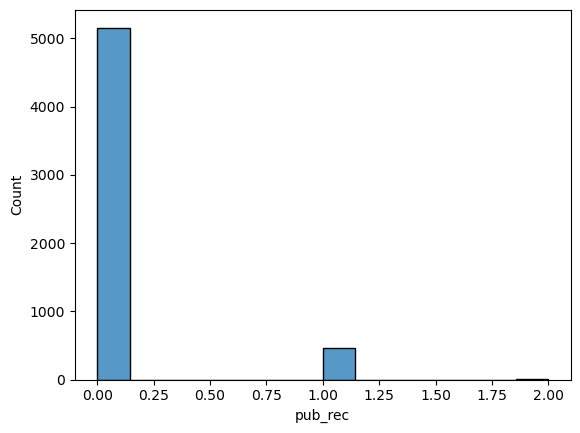

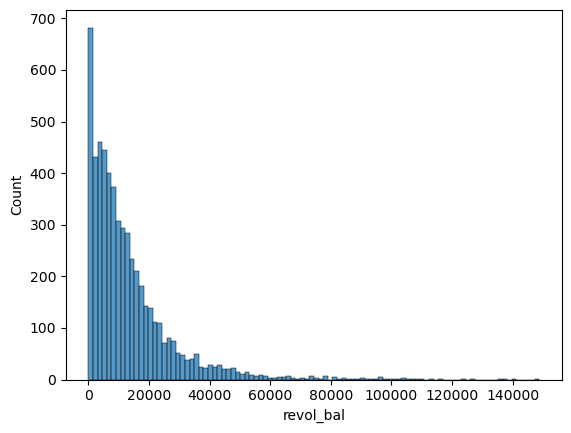

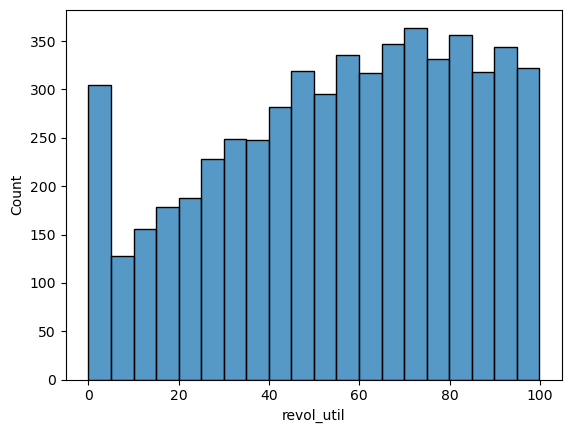

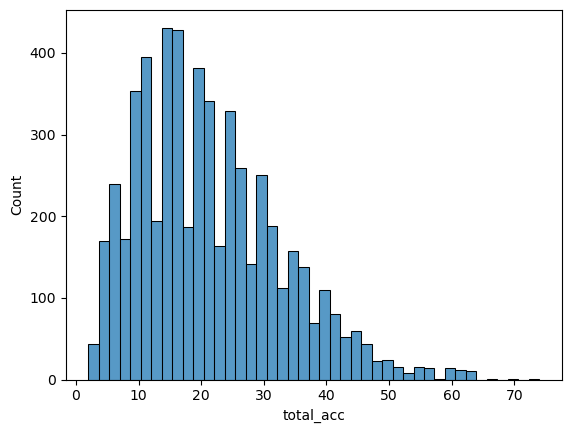

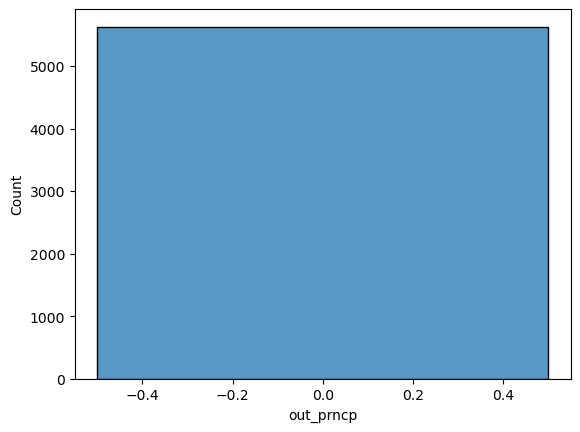

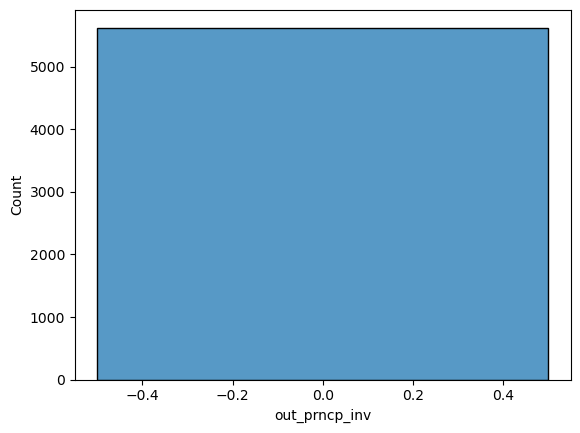

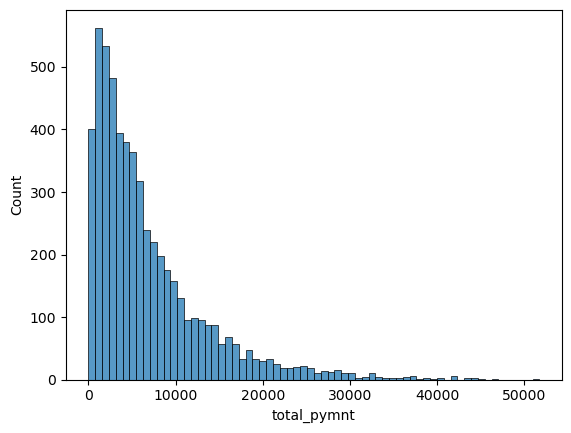

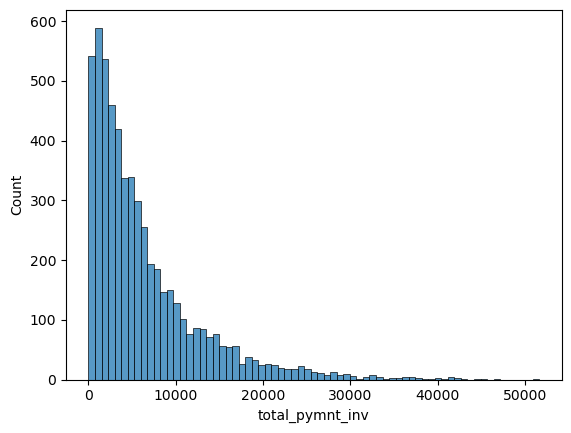

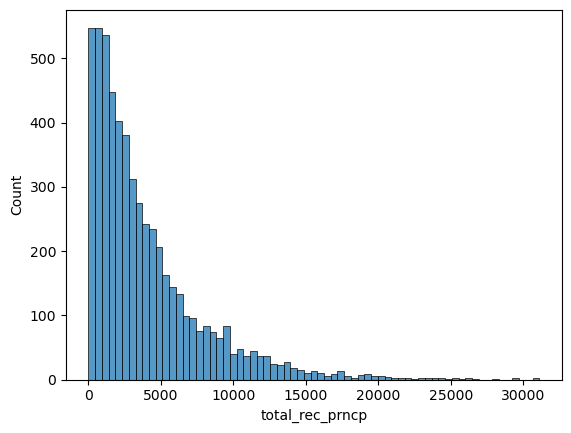

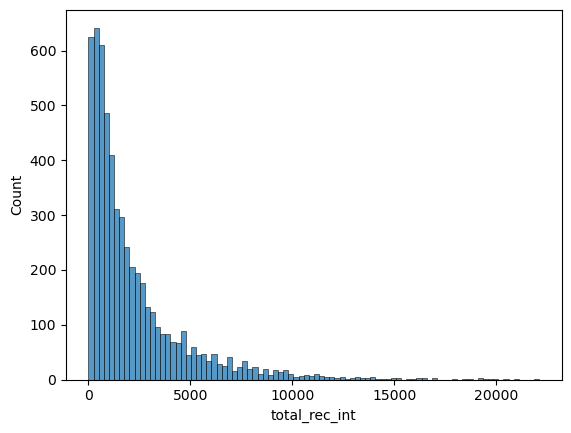

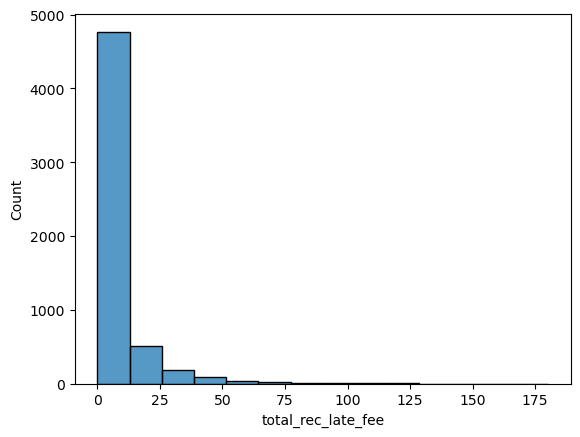

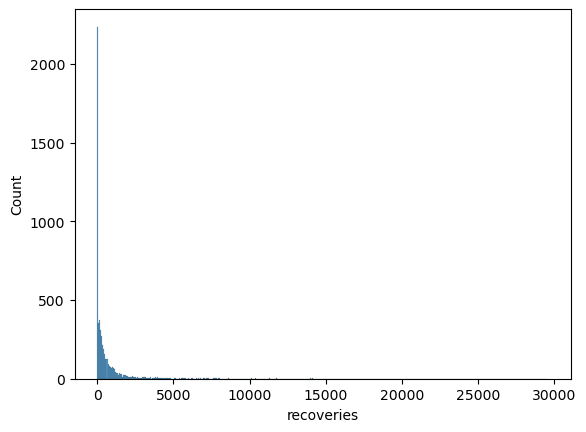

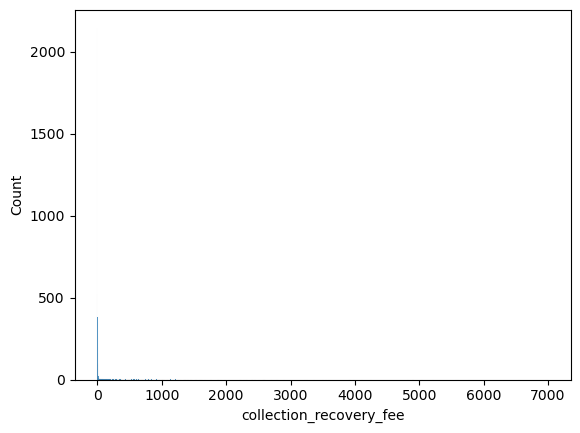

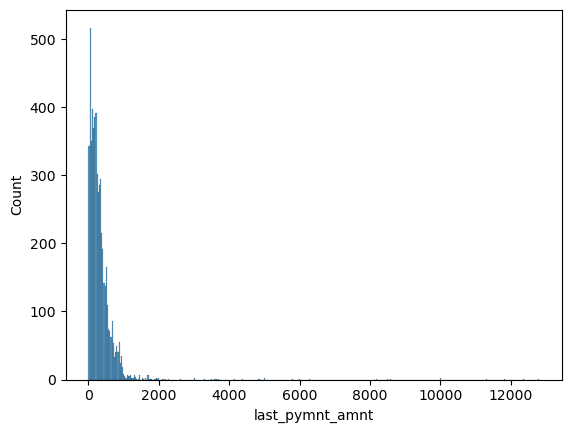

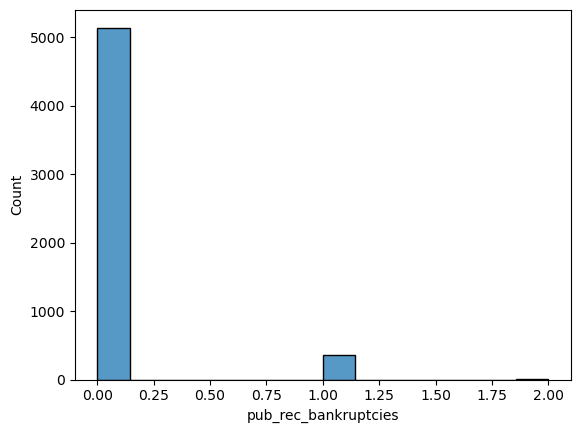

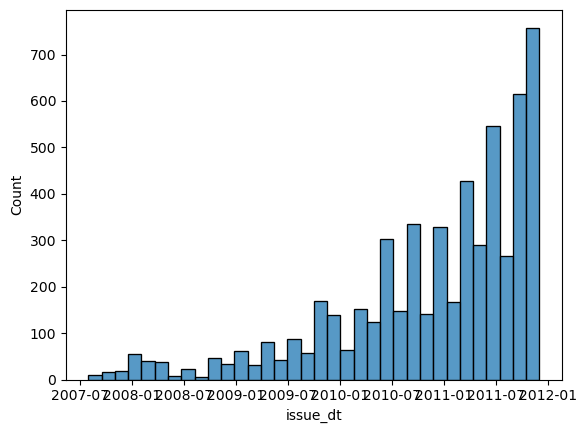

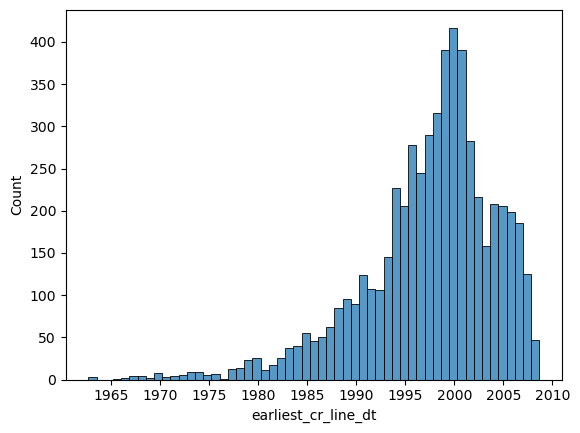

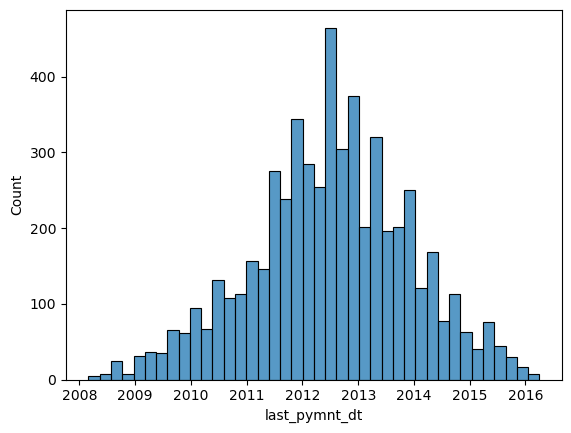

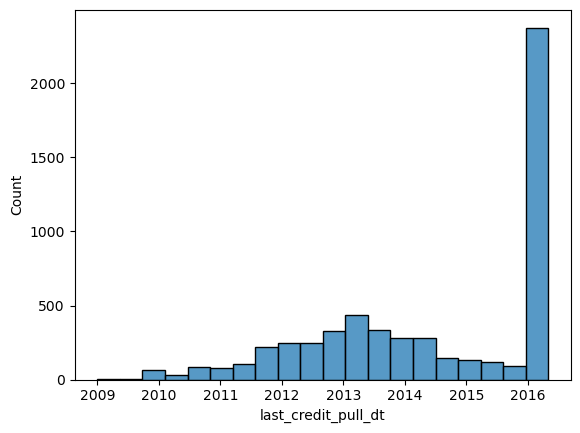

In [157]:
for c in dfLoanDefaulted.columns:
    sns.histplot(dfLoanDefaulted[c])
    plt.show()

## Further analysis on each relavant columns

**Since we have done univariate analysis on all the columns, now we choose individual columns and do subsequent analysis on them (segmented, multivariate) based on situation** 

**Before we do any analysis on the columns lets look at the corelation between the columns with loan status**

In [ ]:
heatLoan = dfLoan2.corr(numeric_only=True)
heatLoan

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(heatLoan,cmap='Greens', annot = True)
plt.show()

### Here are the general observation from the above heatmap
* There seems to be strong correlation between 
    * total payment
    * total payment inv
    * total received principal
    * tatal received interest
    * loan amount
    * funded amount
    * funded amount inv
    * installment
* there also seems to be strong correlation between
    * pub_rec
    * pub_rec_bankrupties

since this values are related we will only be analyzing only few from the set to check for any corelation.

### Start looking at loan_amount 

In [159]:
dfLoanDefaulted.loan_amnt.describe()

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

## Create a dataset with only fully paid and charged off values for further processing

In [16]:
dfLoan3 = dfLoan2[dfLoan2.loan_status.isin(['Fully Paid','Charged Off'])]
dfLoan3.shape

(38577, 53)

**Now lets see how the data works agains non defaulted loans**

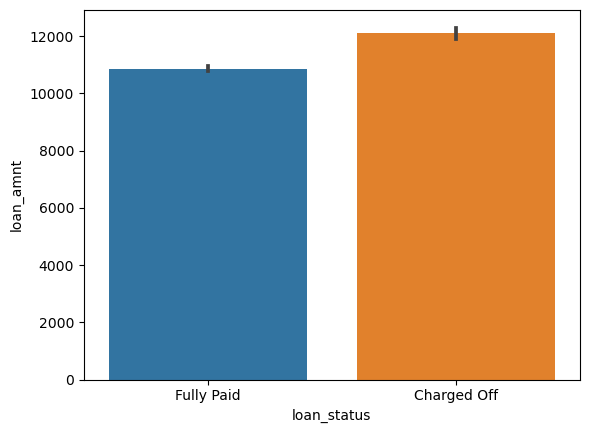

In [161]:
sns.barplot(data=dfLoan3, y='loan_amnt',x='loan_status')
plt.show()

**lets remove the outliers and see**

In [162]:
dfLoan3.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [163]:
iqr = 15000.000000 - 5300.000000
low = 5300.000000 - 1.5*iqr
high = 15000.00 + 1.5*iqr
dfLoanAmt = dfLoan3[(dfLoan3.loan_amnt>low) & (dfLoan3.loan_amnt<high)][['loan_amnt','loan_status']]
dfLoanAmt.head()

,loan_amnt,loan_status
0,5000,Fully Paid
1,2500,Charged Off
2,2400,Fully Paid
3,10000,Fully Paid
5,5000,Fully Paid


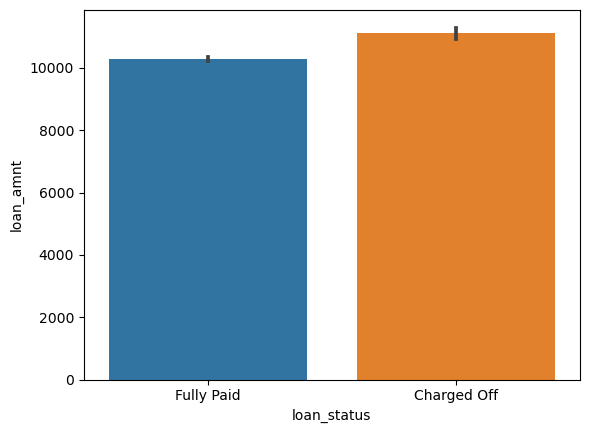

In [164]:
sns.barplot(data=dfLoanAmt, y='loan_amnt',x='loan_status')
plt.show()

**Conclusion** - higher loan amount seems to mean sightly higher risk of write off

### start looking at funded_amnt

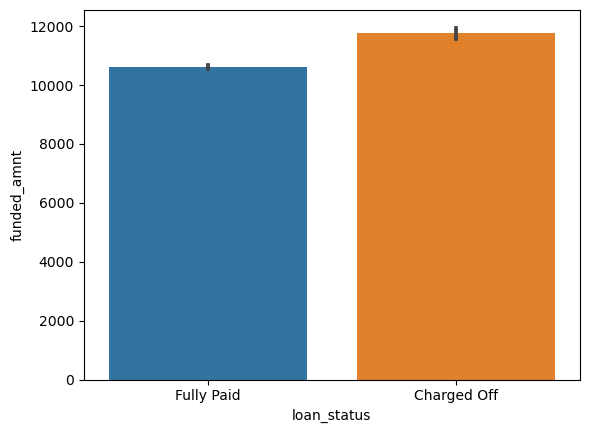

In [165]:
sns.barplot(data=dfLoan3, y='funded_amnt',x='loan_status')
plt.show()

**Conclusion** - Similar to previous conclusion

### start looking at funded_amnt_inv

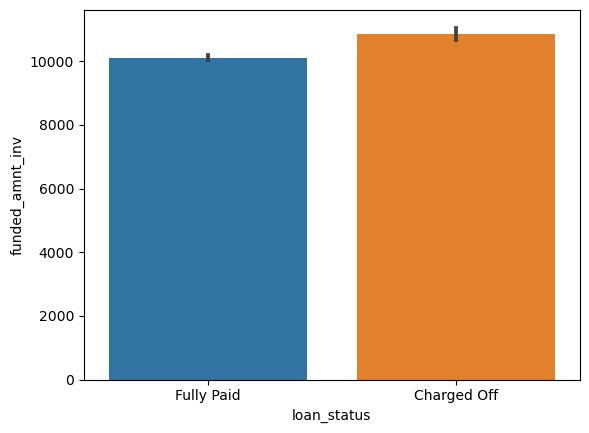

In [166]:
sns.barplot(data=dfLoan3, y='funded_amnt_inv',x='loan_status')
plt.show()

**Conclusion** - Again both charged off and Fully paid loan seems to be having similar values 

**let's look for variables which have lower correlations (We have checked correlation before) and only test them**

### start looking at int_rate

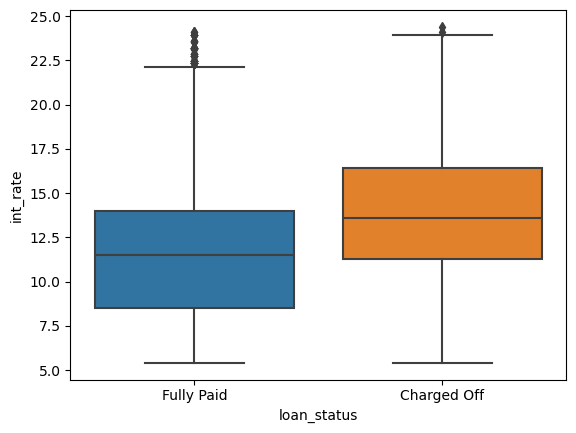

In [239]:
sns.boxplot(data=dfLoan3, y='int_rate',x='loan_status')
plt.show()

**Conclusion** - Ok, clearly higher interest rate means higher changes of charge off. Let's look at the 25,50 and 75 percentile of charge off data

In [240]:
dfLoanDefaulted.int_rate.describe()

count    5627.000000
mean       13.820432
std         3.654413
min         5.420000
25%        11.310000
50%        13.610000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64

In [241]:
dfLoan3[dfLoan3.loan_status=='Fully Paid'].int_rate.describe()

count    32950.000000
mean        11.609761
std          3.599964
min          5.420000
25%          8.490000
50%         11.490000
75%         13.990000
max         24.110000
Name: int_rate, dtype: float64

**conclusion** - so based on the data values we can conclude that if the loan interest is more than 13% there is a higher chance of defaulting

### start looking at installment

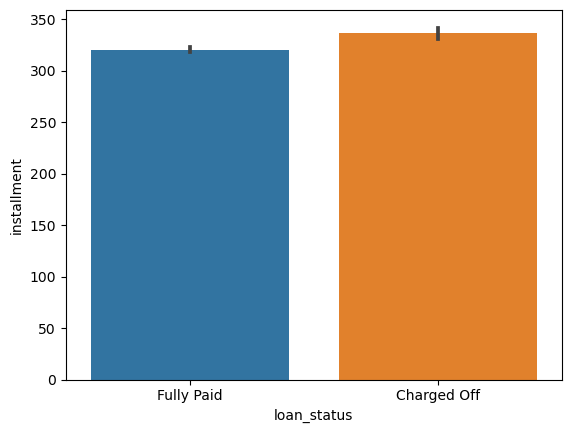

In [170]:
sns.barplot(data=dfLoan3, y='installment',x='loan_status')
plt.show()

**lets remove the outliers and build the graph again**

In [171]:
dfLoan3.installment.describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [172]:
iqr = 425.550000 - 165.740000
low = 165.740000 - 1.5*iqr
high = 425.550000 + 1.5*iqr
dfLoanInstall = dfLoan3[(dfLoan3.installment>low) & (dfLoan3.installment<high)][['installment','loan_status']]
dfLoanInstall.head()

,installment,loan_status
0,162.87,Fully Paid
1,59.83,Charged Off
2,84.33,Fully Paid
3,339.31,Fully Paid
5,156.46,Fully Paid


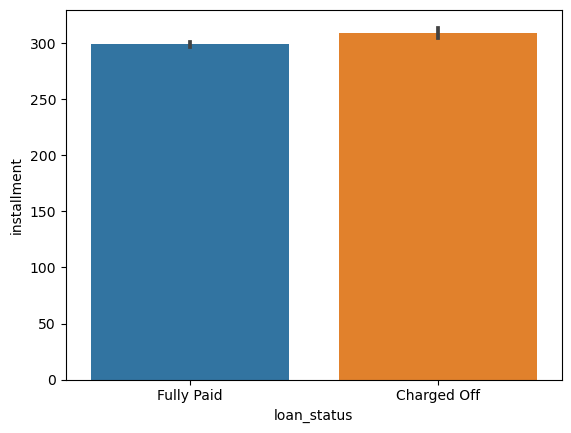

In [173]:
sns.barplot(data=dfLoanInstall, y='installment',x='loan_status')
plt.show()

**Conclusion** - Both charged off and Fully paid loan seems to be having similar values so this is of not much use

### start looking at annual_inc

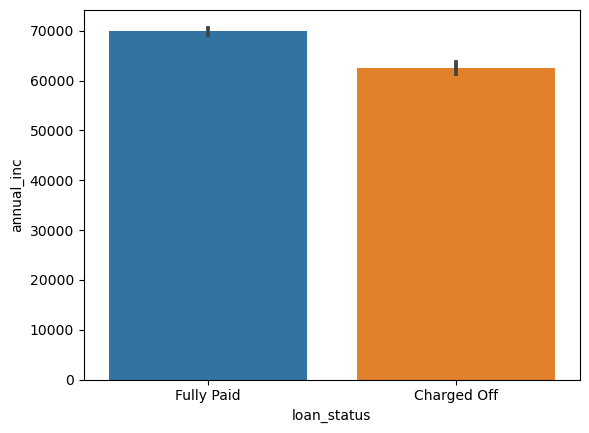

In [174]:
sns.barplot(data=dfLoan3, y='annual_inc',x='loan_status')
plt.show()

**There seems to be too much outliers. lets look at percentile values for fully paid and charged off** 

In [175]:
dfLoanDefaulted.annual_inc.describe()

count    5.627000e+03
mean     6.242730e+04
std      4.777601e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

In [176]:
dfLoan3[dfLoan3.loan_status=='Fully Paid'].annual_inc.describe()

count    3.295000e+04
mean     6.986250e+04
std      6.656225e+04
min      4.000000e+03
25%      4.113275e+04
50%      6.000000e+04
75%      8.400000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

**lets take the value between 25% and 75% and see the graphs again**

In [177]:
iqr = 8.400000e+04 - 4.000000e+03
low = 4.000000e+03 - 1.5*iqr
high = 8.400000e+04 + 1.5*iqr
dfLoanIncome = dfLoan3[(dfLoan3.annual_inc>low) & (dfLoan3.annual_inc<high)][['annual_inc','loan_status']]
dfLoanIncome.head()

,annual_inc,loan_status
0,24000.0,Fully Paid
1,30000.0,Charged Off
2,12252.0,Fully Paid
3,49200.0,Fully Paid
5,36000.0,Fully Paid


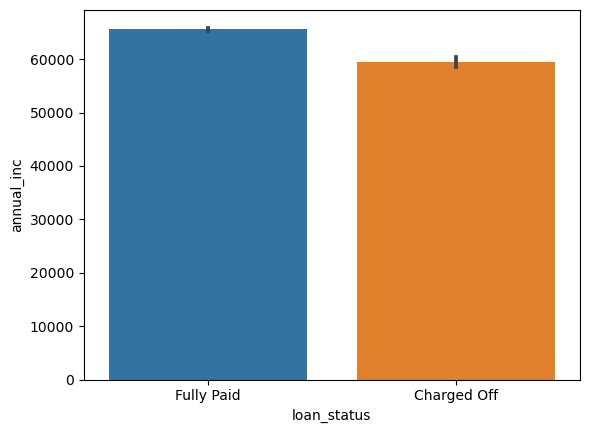

In [178]:
sns.barplot(data=dfLoanIncome, y='annual_inc',x='loan_status')
plt.show()

**Conclusion** - There seems to be a slightly higher chance if the income is more the possibilites of loan payment is hight

### start looking at dti

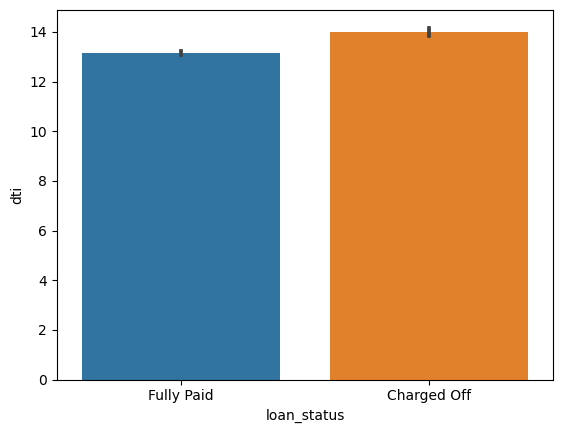

In [179]:
sns.barplot(data=dfLoan3, y='dti',x='loan_status')
plt.show()

**Conclusion** - Though it looks like a lower DTI means a higher chance of loan return but the difference is pretty low

### start looking at delinq_2yrs

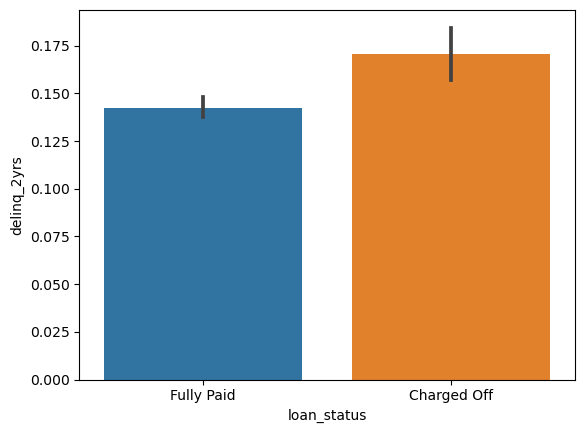

In [180]:
sns.barplot(data=dfLoan3, y='delinq_2yrs',x='loan_status')
plt.show()

**There seems to be too much outliers. lets look at percentile values for fully paid and charged off** 

In [181]:
dfLoanDefaulted.delinq_2yrs.describe()

count    5627.000000
mean        0.170606
std         0.534986
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.000000
Name: delinq_2yrs, dtype: float64

In [182]:
dfLoan3[dfLoan3.loan_status=='Fully Paid'].delinq_2yrs.describe()

count    32950.000000
mean         0.142580
std          0.484491
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

**Conclusion** - Both charged off and Fully paid loan seems to be having similar values so this is of not much use

### start looking at inq_last_6mths

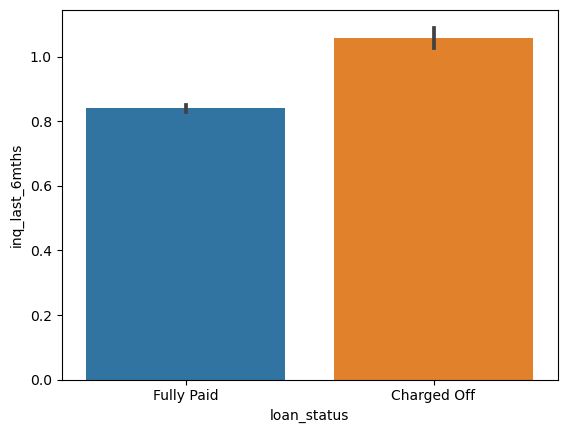

In [183]:
sns.barplot(data=dfLoan3, y='inq_last_6mths',x='loan_status')
plt.show()

**looks like there is corelation between inquery and charge off. Let's see the percentile values**

In [184]:
dfLoanDefaulted.inq_last_6mths.describe()

count    5627.000000
mean        1.058113
std         1.154136
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: inq_last_6mths, dtype: float64

In [185]:
dfLoan3[dfLoan3.loan_status=='Fully Paid'].inq_last_6mths.describe()

count    32950.000000
mean         0.839909
std          1.053524
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

**lets remove the outliers and check**

In [186]:
dfLoan6Month = dfLoan3[(dfLoan3.inq_last_6mths<4)][['inq_last_6mths','loan_status']]
dfLoan6Month.head()

,inq_last_6mths,loan_status
0,1,Fully Paid
2,2,Fully Paid
3,1,Fully Paid
5,3,Fully Paid
6,1,Fully Paid


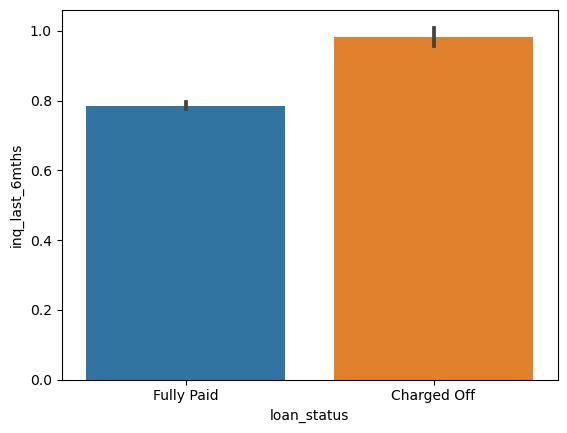

In [187]:
sns.barplot(data=dfLoan6Month, y='inq_last_6mths',x='loan_status')
plt.show()

**Conclusion** - After removing outliers, it looks like the defaulted loans have more inqueries in general

### start looking at open_acc

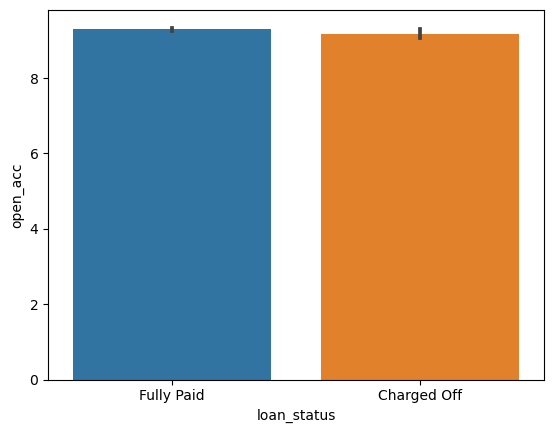

In [188]:
sns.barplot(data=dfLoan3, y='open_acc',x='loan_status')
plt.show()

**lets see the data description so that we can remove the outliers**

In [189]:
dfLoan3.open_acc.describe()

count    38577.000000
mean         9.275423
std          4.401588
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [190]:
iqr = 12 - 6
low = 6 - 1.5*iqr
high = 12 + 1.5*iqr
dfLoanOpenAcc = dfLoan3[(dfLoan3.open_acc>low) & (dfLoan3.open_acc<high)][['open_acc','loan_status']]
dfLoanOpenAcc.head()

,open_acc,loan_status
0,3,Fully Paid
1,3,Charged Off
2,2,Fully Paid
3,10,Fully Paid
5,9,Fully Paid


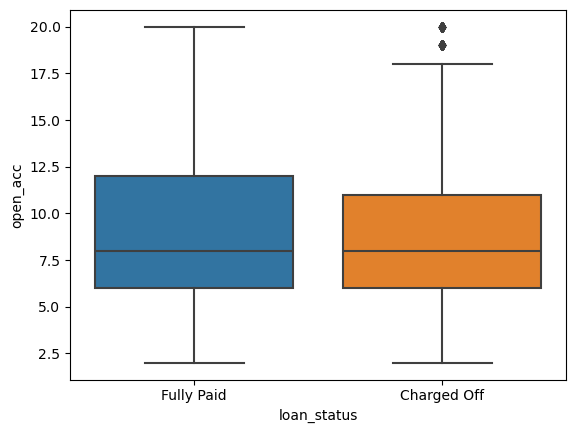

In [229]:
sns.boxplot(data=dfLoanOpenAcc, y='open_acc',x='loan_status')
plt.show()

**Conclusion** - After removing outliers, it looks like the median value for open account is same for both defaulted and fully paid account, howeever fully paid account seems to have generally more accounts then defaulted loans

### start looking at pub_rec

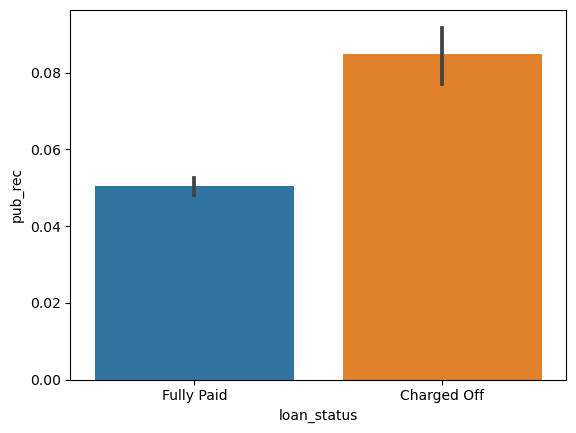

In [231]:
sns.barplot(data=dfLoan3, y='pub_rec',x='loan_status')
plt.show()

lets check the related record of bankrupcy

### start looking at pub_rec_bankruptcies

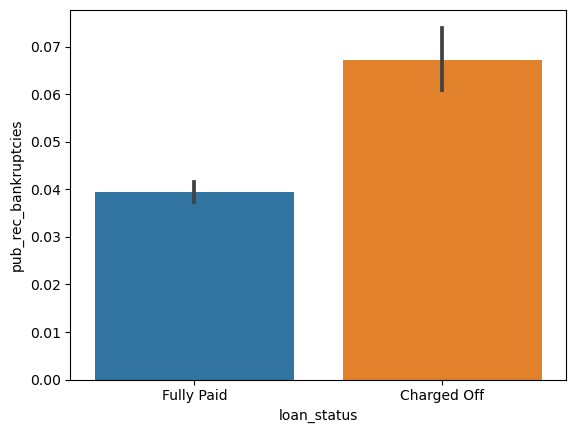

In [194]:
sns.barplot(data=dfLoan3, y='pub_rec_bankruptcies',x='loan_status')
plt.show()

In [235]:
dfLoan3.pub_rec_bankruptcies.describe()

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

**lets check the values where we do have reports of derogatory remark or bankrucy then check the effect of that on loan payment**

In [195]:
dfLoanPubRec = dfLoan3[(dfLoan3['pub_rec']>0) & (dfLoan3['pub_rec_bankruptcies'] > 0)][['loan_status','pub_rec_bankruptcies','pub_rec']]
dfLoanPubRec.head()

,loan_status,pub_rec_bankruptcies,pub_rec
66,Charged Off,1.0,1
70,Fully Paid,1.0,1
77,Fully Paid,1.0,1
161,Fully Paid,1.0,1
271,Fully Paid,1.0,1


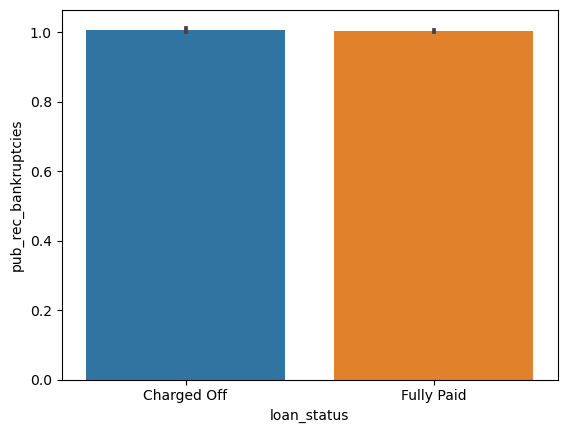

In [196]:
sns.barplot(data=dfLoanPubRec, y='pub_rec_bankruptcies',x='loan_status')
plt.show()

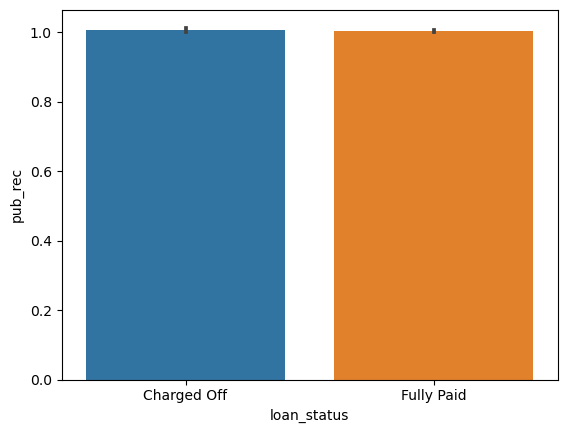

In [197]:
sns.barplot(data=dfLoanPubRec, y='pub_rec',x='loan_status')
plt.show()

**Now let's look at the data with no public derogatory remarks**

In [258]:
dfLoanNoPubRec = dfLoan3[(dfLoan3['pub_rec']<1) & (dfLoan3['pub_rec_bankruptcies'] <1)][['loan_status','pub_rec_bankruptcies','pub_rec']]
dfLoanNoPubRec.head()

,loan_status,pub_rec_bankruptcies,pub_rec
0,Fully Paid,0.0,0
1,Charged Off,0.0,0
2,Fully Paid,0.0,0
3,Fully Paid,0.0,0
5,Fully Paid,0.0,0


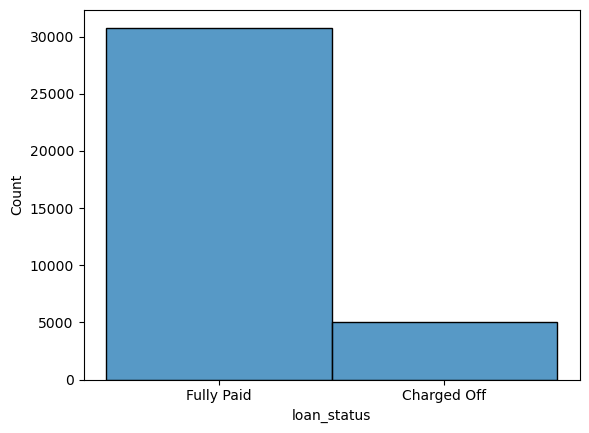

In [263]:
sns.histplot(dfLoanNoPubRec.loan_status)
plt.show()

**conclusion** - so even if the person having a public derogatory remark or bankrupcy there are chances that the person would pay back the loan. However for anyone who have no public record the chances of return is much higher

### start looking at revol_bal

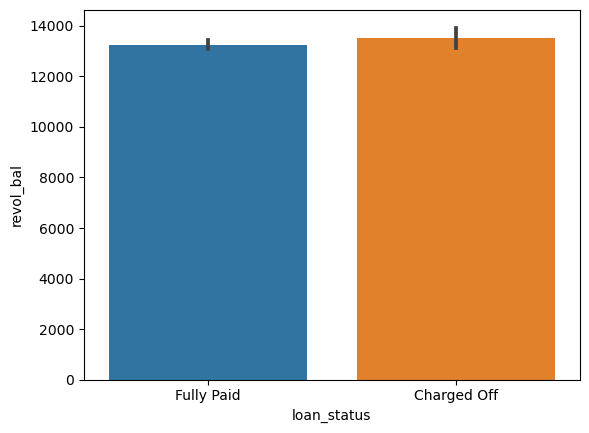

In [198]:
sns.barplot(data=dfLoan3, y='revol_bal',x='loan_status')
plt.show()

**lets find out data distribution and check**

In [199]:
dfLoan3.revol_bal.describe()

count     38577.000000
mean      13289.489826
std       15866.492241
min           0.000000
25%        3650.000000
50%        8762.000000
75%       16912.000000
max      149588.000000
Name: revol_bal, dtype: float64

**huge difference between max and 75% let's clean up the outliers and check** 

In [200]:
iqr = 16912.000000 - 3650.0000
low = 3650.0000 - 1.5*iqr
high = 16912.000000 + 1.5*iqr
dfLoanRevolBal = dfLoan3[(dfLoan3.revol_bal>low) & (dfLoan3.revol_bal<high)][['revol_bal','loan_status']]
dfLoanRevolBal.head()

,revol_bal,loan_status
0,13648,Fully Paid
1,1687,Charged Off
2,2956,Fully Paid
3,5598,Fully Paid
5,7963,Fully Paid


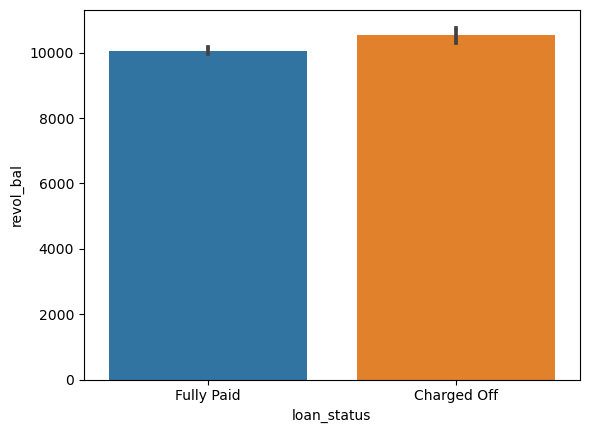

In [201]:
sns.barplot(data=dfLoanRevolBal, y='revol_bal',x='loan_status')
plt.show()

**conclusion** - there seems to be a very tiny chance of write of for higher revol_bal value

### start looking at revol_util

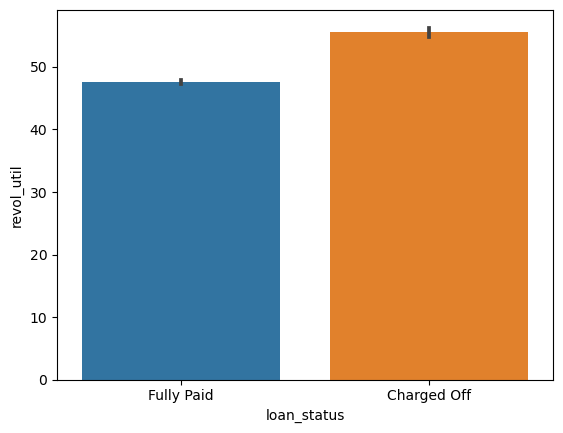

In [202]:
sns.barplot(data=dfLoan3, y='revol_util',x='loan_status')
plt.show()

**conclusion** - higher utlization means a higher chance of defaults

### start looking at total_acc

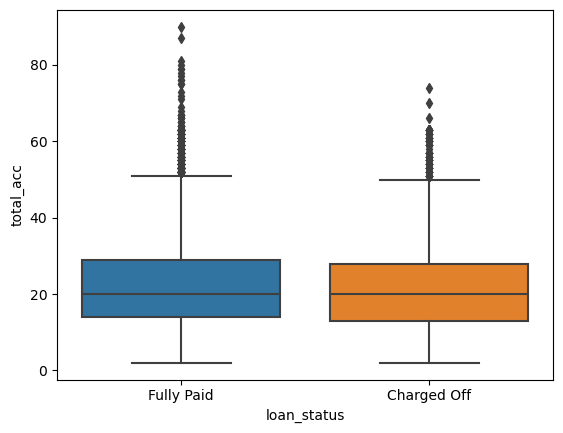

In [203]:
sns.boxplot(data=dfLoan3, y='total_acc',x='loan_status')
plt.show()

**too many outliers lets clean the data**

In [204]:
dfLoan3.total_acc.describe()

count    38577.000000
mean        22.052648
std         11.425861
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

In [205]:
iqr = 29.000000 - 13.000000
low = 13.000000 - 1.5*iqr
high = 29.000000 + 1.5*iqr
dfLoanRevolBal = dfLoan3[(dfLoan3.total_acc>low) & (dfLoan3.total_acc<high)][['total_acc','loan_status']]
dfLoanRevolBal.head()

,total_acc,loan_status
0,9,Fully Paid
1,4,Charged Off
2,10,Fully Paid
3,37,Fully Paid
5,12,Fully Paid


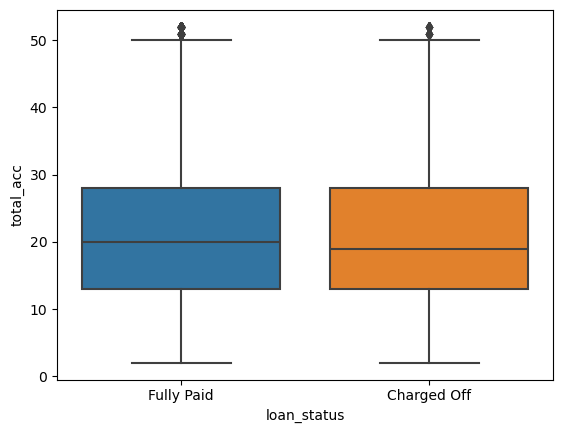

In [232]:
sns.boxplot(data=dfLoanRevolBal, y='total_acc',x='loan_status')
plt.show()

**conclusion** - total account seems to have negligble effect on defaults

### start looking at out_prncp and out_prncp_inv

The above two columns provided peculear distribution. So we need to check the data once

In [207]:
dfLoan3.out_prncp.value_counts()

out_prncp
0.0    38577
Name: count, dtype: int64

In [208]:
dfLoan3.out_prncp_inv.value_counts()

out_prncp_inv
0.0    38577
Name: count, dtype: int64

**these columns should be ignored**

### lets check the columns which are corelated with loan amount

The following columns have highter corelation. So we would do a set of bar graphs in one go 
* total_pymnt
* total_pymnt_inv
* total_rec_prncp
* total_rec_int

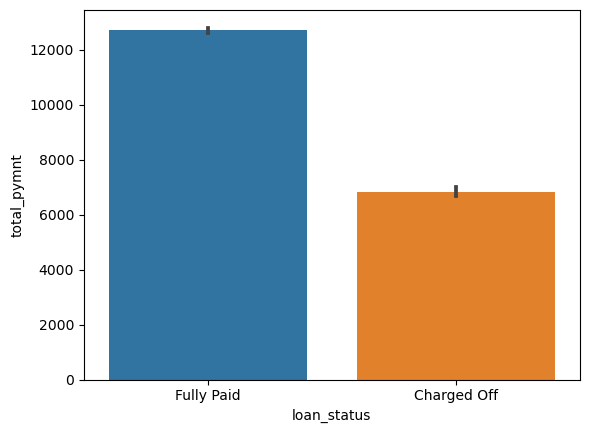

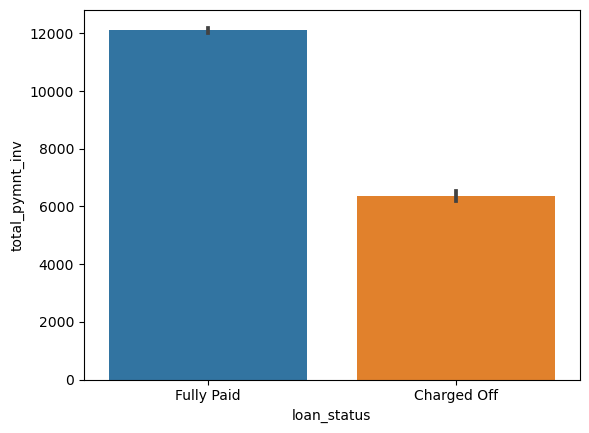

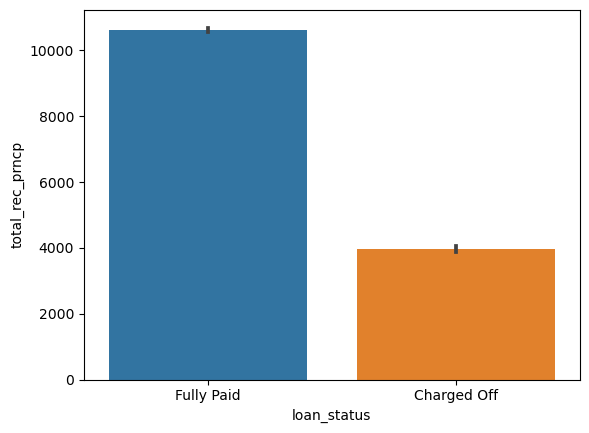

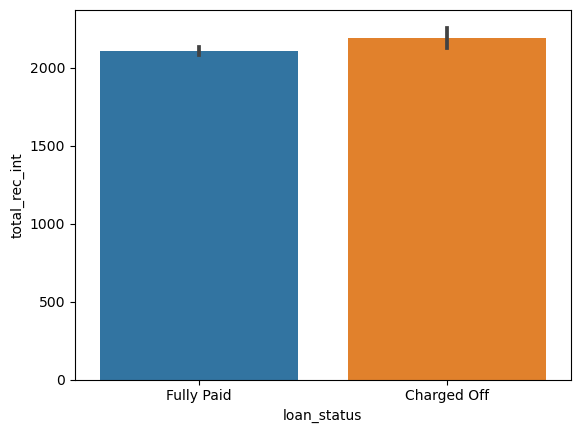

In [209]:
for c in ['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int']:
    sns.barplot(data=dfLoan3, y=c,x='loan_status')
    plt.show()

**Conclusion** - All the variables have good corelation

### lets check last_pymnt_amnt

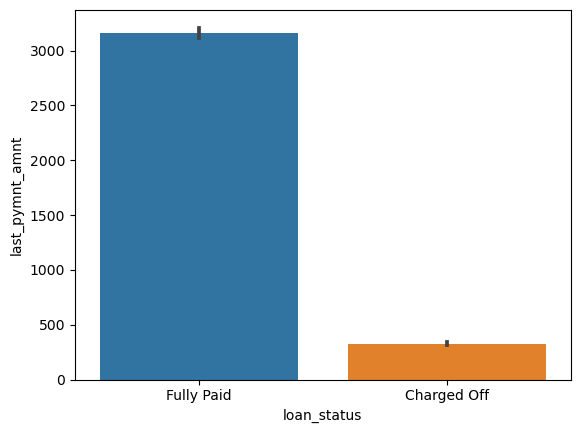

In [210]:
sns.barplot(data=dfLoan3, y='last_pymnt_amnt',x='loan_status')
plt.show()

**Conclusion** - Clearly for charge off the payment is less than $ 500

## Let's do some deep dive on multiple variables

### Lets check verifiction status

In [211]:
#dfLoan3.pivot_table(index='verification_status',columns='loan_status',aggfunc='size').plot(kind='bar')
#plt.show()

dfloanVerific = dfLoan3.groupby(['verification_status', 'loan_status'], as_index=False).count().iloc[:, 0:3]
dfloanVerific['status_per'] = (dfloanVerific['loan_amnt']*100/dfloanVerific.groupby('verification_status')['loan_amnt'].transform('sum')).round(2)
dfloanVerific

,verification_status,loan_status,loan_amnt,status_per
0,Not Verified,Charged Off,2142,12.83
1,Not Verified,Fully Paid,14552,87.17
2,Source Verified,Charged Off,1434,14.82
3,Source Verified,Fully Paid,8243,85.18
4,Verified,Charged Off,2051,16.80
5,Verified,Fully Paid,10155,83.20


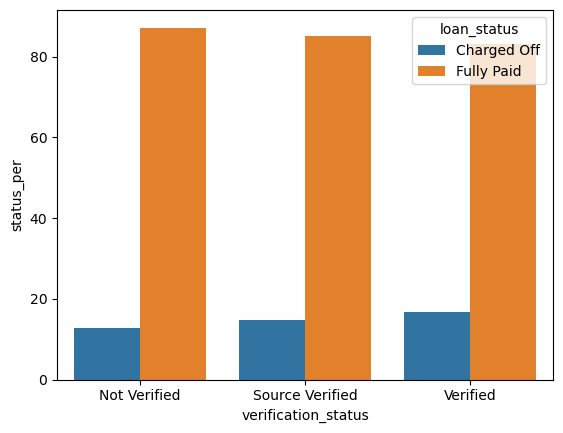

In [212]:
sns.barplot(x=dfloanVerific['verification_status'], y=dfloanVerific['status_per'], hue=dfloanVerific['loan_status'])
plt.show()

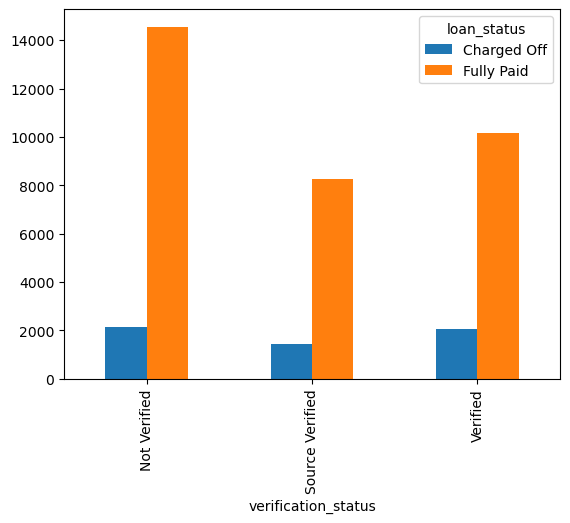

In [233]:
dfLoan3.pivot_table(index='verification_status',columns='loan_status',aggfunc='size').plot(kind='bar')
plt.show()

**since both source verified and verfied means same let's add the values and see how the data comes**

In [213]:
#dfLoan3.groupby(['verification_status', 'loan_status'], as_index=False).count()
dfLoanVerfication = dfLoan3[['verification_status', 'loan_status','loan_amnt']]
dfLoanVerfication.verification_status=dfLoanVerfication.verification_status.apply(lambda x: 'Verified' if (x=='Source Verified') else x)
dfLoanVerfication.verification_status.value_counts()

/var/folders/zq/6886vcfx62lb3ft4vhrs8_g80000gn/T/ipykernel_99623/2138898262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfLoanVerfication.verification_status=dfLoanVerfication.verification_status.apply(lambda x: 'Verified' if (x=='Source Verified') else x)


verification_status
Verified        21883
Not Verified    16694
Name: count, dtype: int64

In [214]:
dfloanVerific = dfLoanVerfication.groupby(['verification_status', 'loan_status'], as_index=False).count().iloc[:, 0:3]
dfloanVerific['status_per'] = (dfloanVerific['loan_amnt']*100/dfloanVerific.groupby('verification_status')['loan_amnt'].transform('sum')).round(2)
dfloanVerific

,verification_status,loan_status,loan_amnt,status_per
0,Not Verified,Charged Off,2142,12.83
1,Not Verified,Fully Paid,14552,87.17
2,Verified,Charged Off,3485,15.93
3,Verified,Fully Paid,18398,84.07


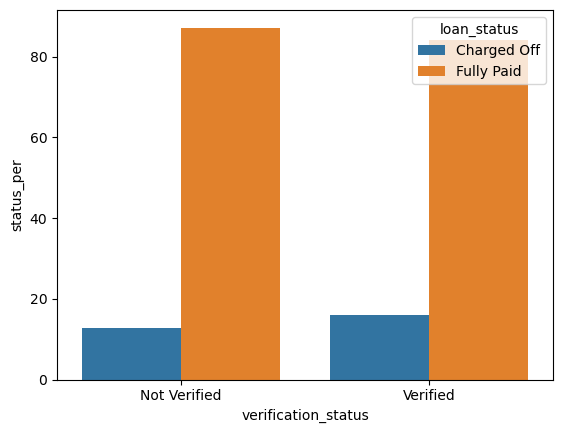

In [215]:
sns.barplot(x=dfloanVerific['verification_status'], y=dfloanVerific['status_per'], hue=dfloanVerific['loan_status'])
plt.show()

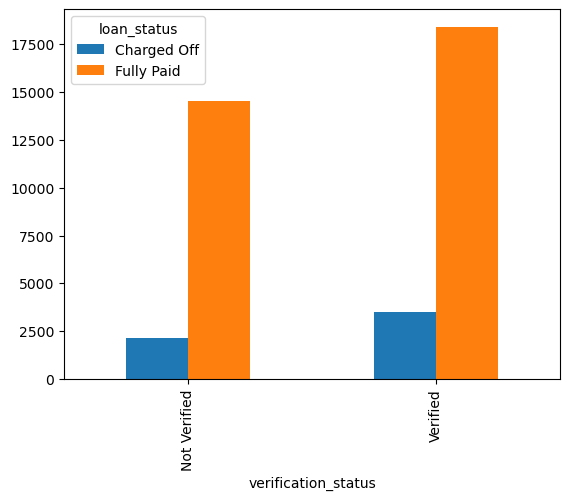

In [234]:
dfLoanVerfication.pivot_table(index='verification_status',columns='loan_status',aggfunc='size').plot(kind='bar')
plt.show()

**conclusion** - So it looks like verified account actually have slightly chances of default than non verfied account

### Effect of home ownership on defaults

In [216]:
#dfLoan3.pivot_table(index='home_ownership',columns='loan_status',aggfunc='size').plot(kind='bar')
#plt.show()

dfloanHome = dfLoan3.groupby(['home_ownership', 'loan_status'], as_index=False).count().iloc[:, 0:3]
dfloanHome['status_per'] = (dfloanHome['loan_amnt']*100/dfloanHome.groupby('home_ownership')['loan_amnt'].transform('sum')).round(2)
dfloanHome

,home_ownership,loan_status,loan_amnt,status_per
0,MORTGAGE,Charged Off,2327,13.67
1,MORTGAGE,Fully Paid,14694,86.33
2,NONE,Fully Paid,3,100.00
3,OTHER,Charged Off,18,18.37
4,OTHER,Fully Paid,80,81.63
5,OWN,Charged Off,443,14.89
6,OWN,Fully Paid,2532,85.11
7,RENT,Charged Off,2839,15.36
8,RENT,Fully Paid,15641,84.64


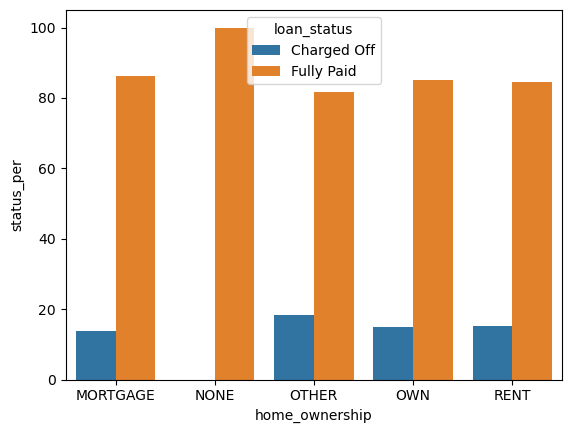

In [217]:
sns.barplot(x=dfloanHome['home_ownership'], y=dfloanHome['status_per'], hue=dfloanHome['loan_status'])
plt.show()

**The people living on rent or have homes mortgaged have highest number of loans as compared to people have own houses.**

**However, the percentage of defaults is same across categories**

### Effect of term on defaults 

In [218]:
dfloanTermStatus = dfLoan3.groupby(['term', 'loan_status'], as_index=False).count().iloc[:, 0:3]
dfloanTermStatus['status_per'] = (dfloanTermStatus['loan_amnt']*100/dfloanTermStatus.groupby('term')['loan_amnt'].transform('sum')).round(2)
dfloanTermStatus

,term,loan_status,loan_amnt,status_per
0,36 months,Charged Off,3227,11.09
1,36 months,Fully Paid,25869,88.91
2,60 months,Charged Off,2400,25.31
3,60 months,Fully Paid,7081,74.69


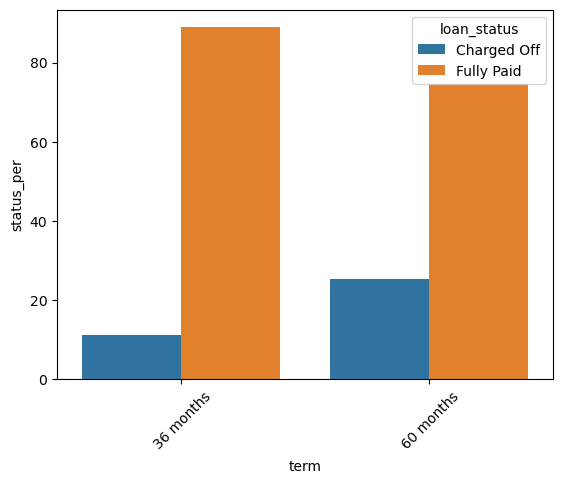

In [219]:
plt.xticks(rotation=45)
sns.barplot(x=dfloanTermStatus['term'], y=dfloanTermStatus['status_per'], hue=dfloanTermStatus['loan_status'])
plt.show()

**also check the loan amount against terms. Does longer terms have greater loan amount?**

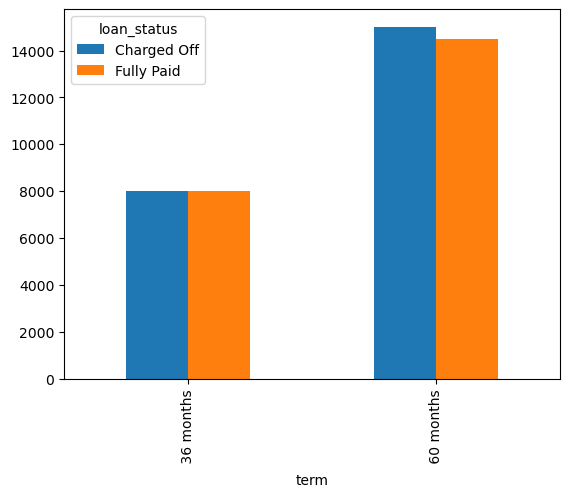

In [250]:
dfLoan3.pivot_table(index='term',values='loan_amnt',columns='loan_status',aggfunc='median').plot(kind='bar')
plt.show()

**Lets check it with installments**

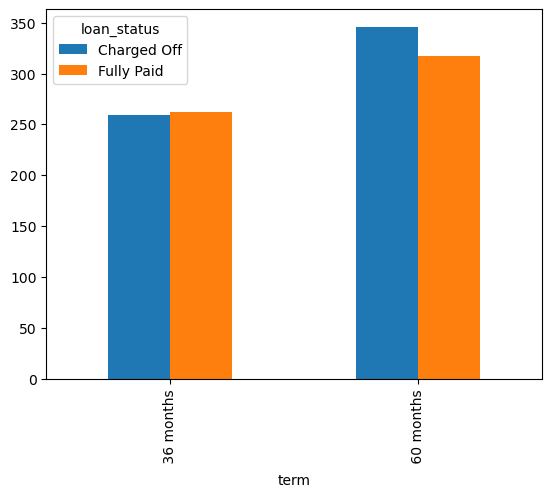

In [251]:
dfLoan3.pivot_table(index='term',values='installment',columns='loan_status',aggfunc='median').plot(kind='bar')
plt.show()

**Lets check how income effects on loan amount for defaulted loans**

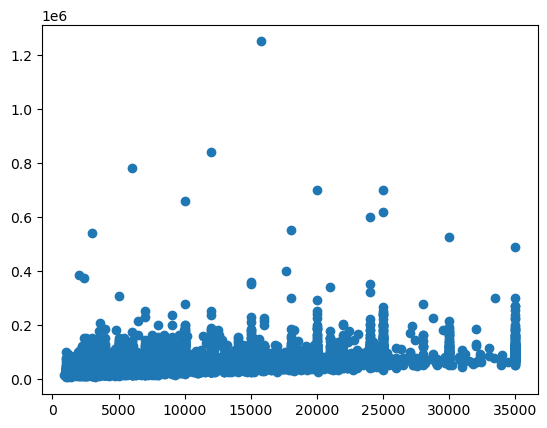

In [252]:
plt.scatter(data = dfLoanDefaulted , x = 'loan_amnt', y = 'annual_inc')
plt.show()

**looks like there are too much outliers. Let's remove them**

In [253]:
dfLoanDefaulted.annual_inc.describe()

count    5.627000e+03
mean     6.242730e+04
std      4.777601e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

In [254]:
iqr = 7.500000e+04 - 3.700000e+04
low = 3.700000e+04 - 1.5*iqr
high = 7.500000e+04 + 1.5*iqr
dfLoanDefaultedIncome = dfLoanDefaulted[(dfLoanDefaulted.annual_inc>low) & (dfLoanDefaulted.annual_inc<high)]
dfLoanDefaultedIncome.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_dt,earliest_cr_line_dt,last_pymnt_dt,last_credit_pull_dt
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,435.17,0.0,117.08,1.1100,119.66,0.0,2011-12-01,1999-04-01,2013-04-01,2013-09-01
8,5600,5600,5600.0,60 months,21.28,152.39,F,F2,4 years,OWN,...,294.94,0.0,189.06,2.0900,152.39,0.0,2011-12-01,2004-04-01,2012-04-01,2012-08-01
9,5375,5375,5350.0,60 months,12.69,121.45,B,B5,< 1 year,RENT,...,533.42,0.0,269.29,2.5200,121.45,0.0,2011-12-01,2004-09-01,2012-11-01,2013-03-01
12,9000,9000,9000.0,36 months,13.49,305.38,C,C1,< 1 year,RENT,...,570.26,0.0,444.30,4.1600,305.38,0.0,2011-12-01,2004-04-01,2012-07-01,2012-11-01
14,10000,10000,10000.0,36 months,10.65,325.74,B,B2,3 years,RENT,...,1393.42,0.0,645.10,6.3145,325.74,0.0,2011-12-01,1991-05-01,2013-10-01,2014-03-01


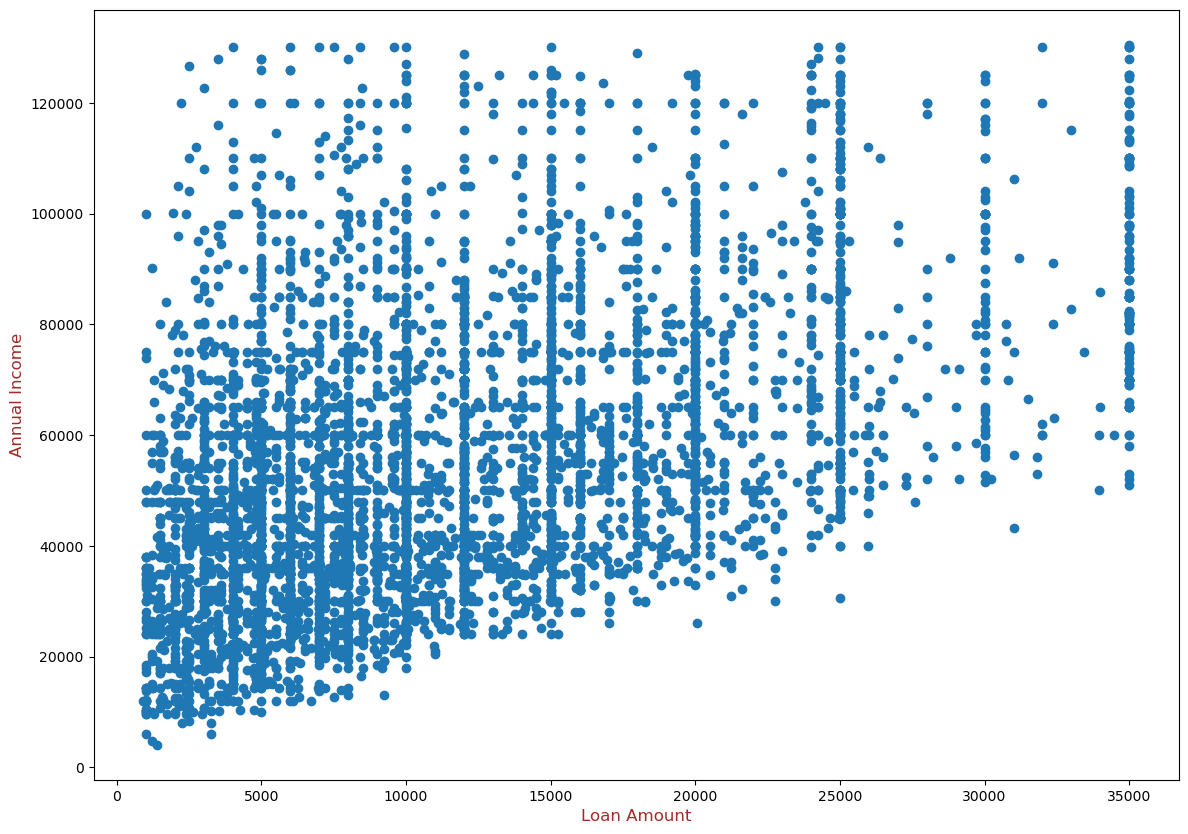

In [256]:
plt.figure(figsize = [14,10])
plt.scatter(data = dfLoanDefaultedIncome , x = 'loan_amnt', y = 'annual_inc')
plt.xlabel("Loan Amount", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Annual Income", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.show()

**lets check how income works on loan defaults**

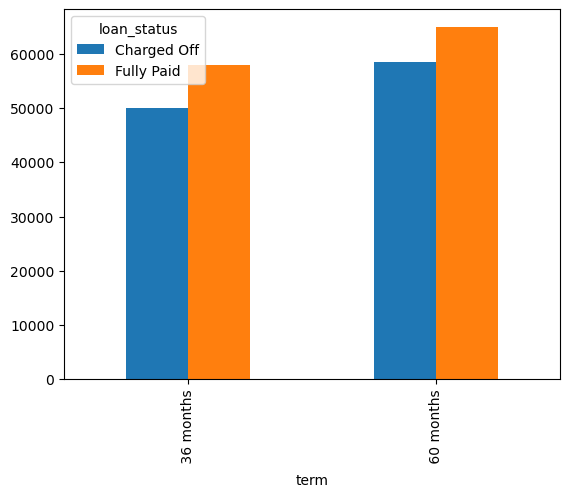

In [257]:
dfLoan3.pivot_table(index='term',values='annual_inc',columns='loan_status',aggfunc='median').plot(kind='bar')
plt.show()

**Conclusion** - people with 60 months loan terms seems to default more becasue the amounts are more too.

### Effect of emp lengths on defaults

In [220]:
dfLoanEmpLen = dfLoan3.groupby(['emp_length', 'loan_status'], as_index=False).count().iloc[:, 0:3]
dfLoanEmpLen['status_per'] = (dfLoanEmpLen['loan_amnt']*100/dfLoanEmpLen.groupby('emp_length')['loan_amnt'].transform('sum')).round(2)
dfLoanEmpLen

,emp_length,loan_status,loan_amnt,status_per
0,1 year,Charged Off,456,14.39
1,1 year,Fully Paid,2713,85.61
2,10+ years,Charged Off,1331,15.68
3,10+ years,Fully Paid,7157,84.32
4,2 years,Charged Off,567,13.21
5,2 years,Fully Paid,3724,86.79
6,3 years,Charged Off,555,13.83
7,3 years,Fully Paid,3457,86.17
8,4 years,Charged Off,462,13.82
9,4 years,Fully Paid,2880,86.18


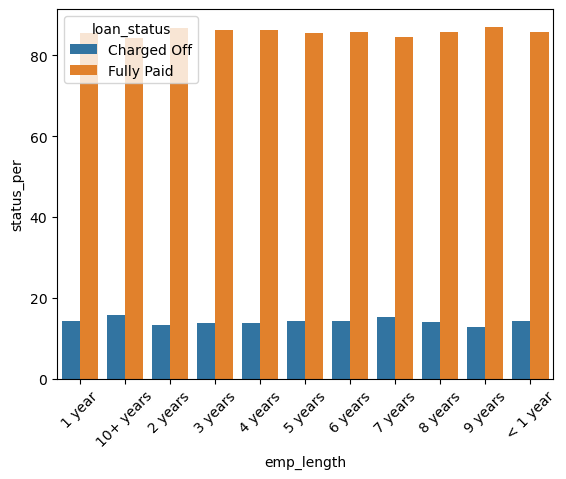

In [221]:
plt.xticks(rotation=45)
sns.barplot(x=dfLoanEmpLen['emp_length'], y=dfLoanEmpLen['status_per'], hue=dfLoanEmpLen['loan_status'])
plt.show()

**conclusion** - employement length does not seems to make much effect on defaults. However people below 1 year and over 10 years of experience tends to default slightly higher

### Effect of purpose on loan default

In [222]:
dfLoanPur = dfLoan3.groupby(['purpose', 'loan_status'], as_index=False).count().iloc[:, 0:3]
dfLoanPur['status_per'] = (dfLoanPur['loan_amnt']*100/dfLoanPur.groupby('purpose')['loan_amnt'].transform('sum')).round(2)
dfLoanPur

,purpose,loan_status,loan_amnt,status_per
0,car,Charged Off,160,10.67
1,car,Fully Paid,1339,89.33
2,credit_card,Charged Off,542,10.78
3,credit_card,Fully Paid,4485,89.22
4,debt_consolidation,Charged Off,2767,15.33
5,debt_consolidation,Fully Paid,15288,84.67
6,educational,Charged Off,56,17.23
7,educational,Fully Paid,269,82.77
8,home_improvement,Charged Off,347,12.07
9,home_improvement,Fully Paid,2528,87.93


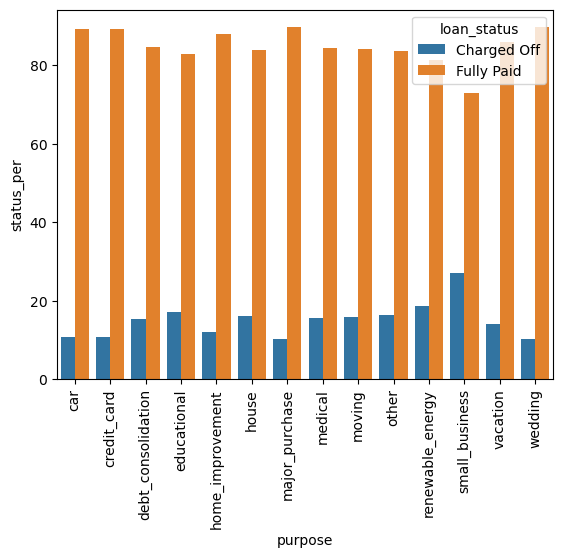

In [223]:
plt.xticks(rotation=90)
sns.barplot(x=dfLoanPur['purpose'], y=dfLoanPur['status_per'], hue=dfLoanPur['loan_status'])
plt.show()

**lets look at the median loan percentage for each loan type**

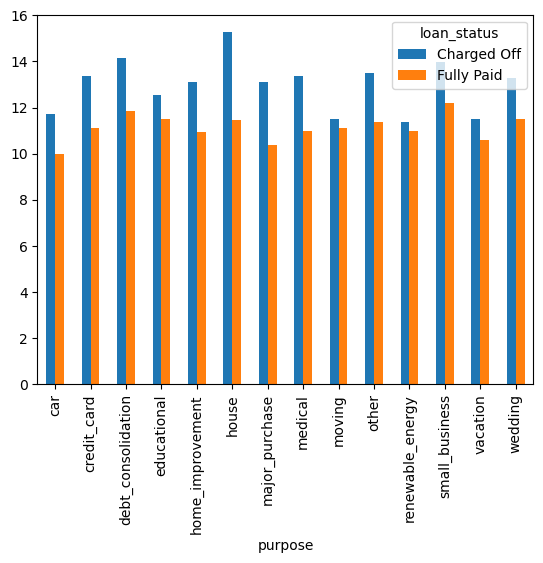

In [245]:
dfLoan3.pivot_table(index='purpose',values='int_rate',columns='loan_status',aggfunc='median').plot(kind='bar')
plt.show()

**lets check the verification status for defaulted loans in different category**

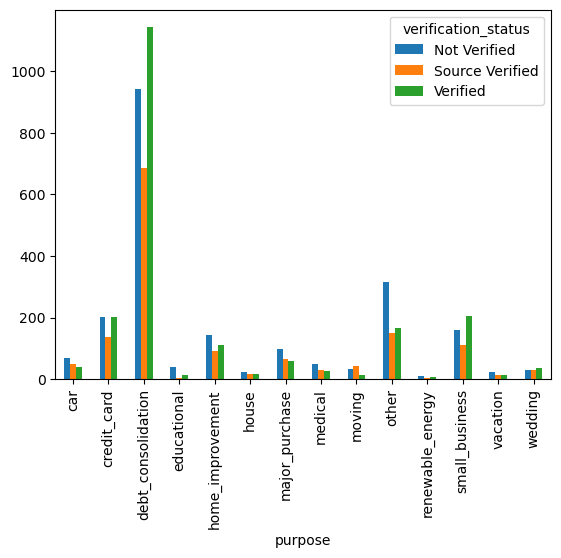

In [247]:
dfLoanDefaulted.pivot_table(index='purpose',columns='verification_status',aggfunc='size').plot(kind='bar')
plt.show()

**Lets look at small businss only**

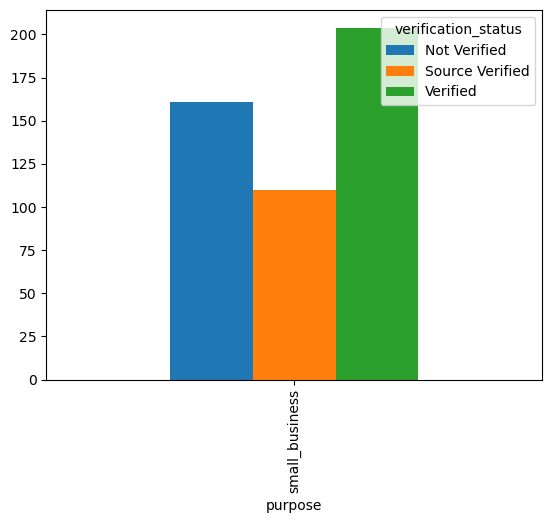

In [249]:
dfLoanDefaulted[dfLoanDefaulted.purpose=='small_business'].pivot_table(index='purpose',columns='verification_status',aggfunc='size').plot(kind='bar')
plt.show()

**conclusion** - it looks like small business have a higher tendency to default then any other categories. also it is not that only small business has more interest rates. Moreover verified loans defaulted as much as non verified loans.

### Let's check states

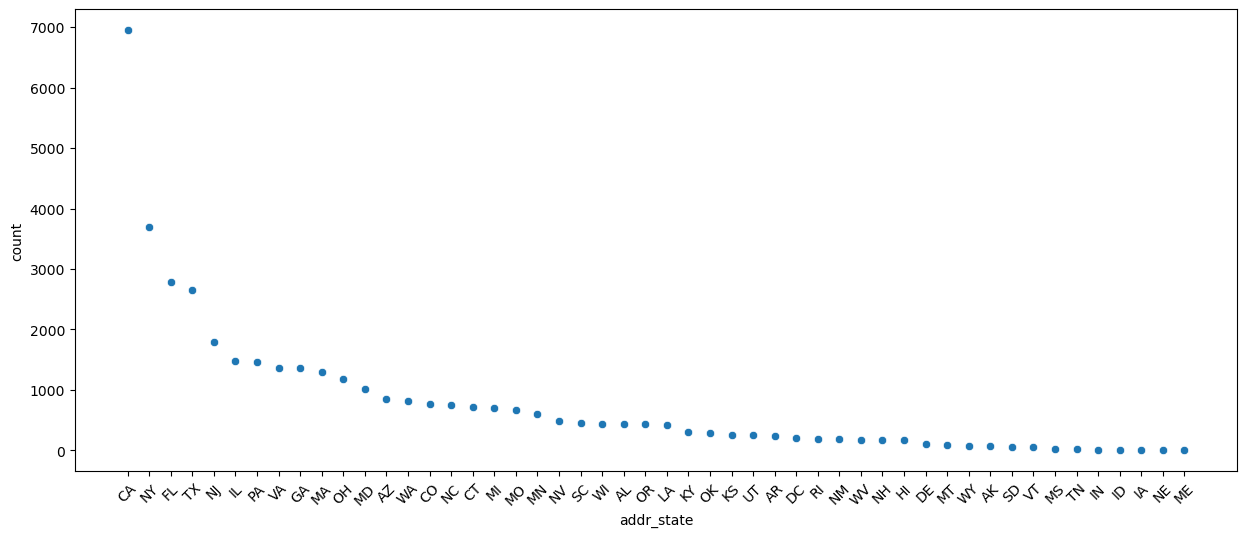

In [273]:
dfLoanStates = dfLoan3.addr_state.value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.scatterplot(dfLoanStates)
plt.show()

**lets look at top 10 loan taking states**

In [274]:
dfLoanStates.head(10)

addr_state
CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
Name: count, dtype: int64

**And bottom 10 loan taking states**

In [275]:
dfLoanStates.tail(10).sort_values()

addr_state
ME     3
IA     5
NE     5
ID     6
IN     9
TN    17
MS    19
VT    53
SD    62
AK    78
Name: count, dtype: int64

### Lets check loan status accross states

In [286]:
dfLoanState1 = dfLoan3.groupby(['addr_state', 'loan_status'], as_index=False).count().iloc[:, 0:3]
dfLoanState1['status_per'] = (dfLoanState1['loan_amnt']*100/dfLoanState1.groupby('addr_state')['loan_amnt'].transform('sum')).round(2)
dfLoanState1

,addr_state,loan_status,loan_amnt,status_per
0,AK,Charged Off,15,19.23
1,AK,Fully Paid,63,80.77
2,AL,Charged Off,54,12.41
3,AL,Fully Paid,381,87.59
4,AR,Charged Off,27,11.49
...,...,...,...,...
92,WI,Fully Paid,377,85.68
93,WV,Charged Off,21,12.21
94,WV,Fully Paid,151,87.79
95,WY,Charged Off,4,5.00


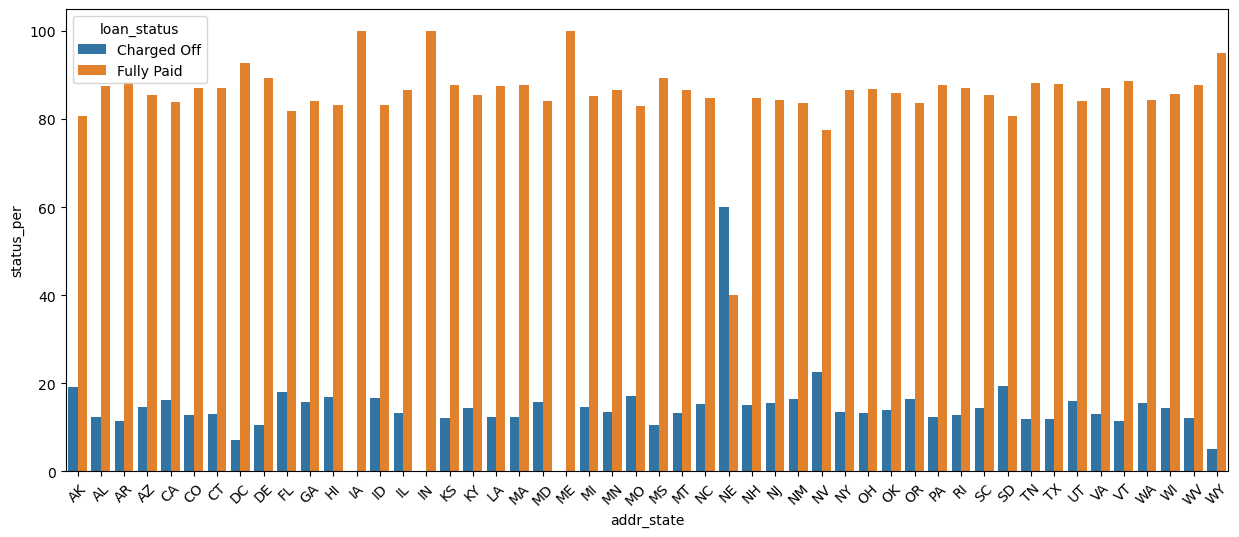

In [288]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.barplot(x=dfLoanState1['addr_state'], y=dfLoanState1['status_per'], hue=dfLoanState1['loan_status'])
plt.show()

### Effect of revol_util on loan default

/var/folders/zq/6886vcfx62lb3ft4vhrs8_g80000gn/T/ipykernel_99623/4026733052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfLoan3['revol_util_range'] = pd.cut(dfLoan3['revol_util'], 10, labels= np.arange(0,10))


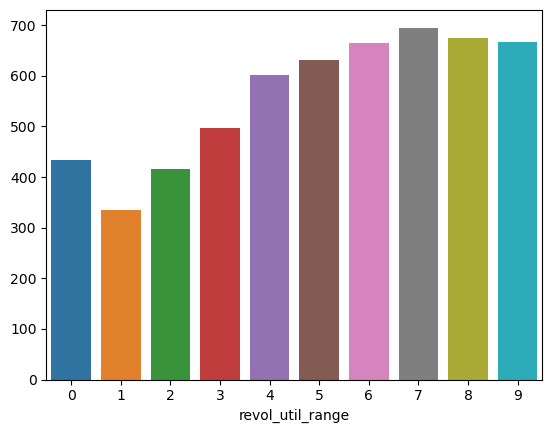

In [224]:
dfLoan3['revol_util_range'] = pd.cut(dfLoan3['revol_util'], 10, labels= np.arange(0,10))
dfLoanDefaulted1 = dfLoan3[dfLoan3['loan_status'] == 'Charged Off']
vc=dfLoanDefaulted1['revol_util_range'].value_counts()
sns.barplot(x=vc.index, y=vc.values)
plt.show()

**conclusion** - It looks like if revolving line utilization goes over 2 the chances of default keeps increasing

### Analyze the correlation between percentage of loan defaulted with other data
- Check the median of interest rates by grades and subgrades
- Check the median of loan_amount by grades and subgrades
- Check the median of annual_income by grades and subgrades

In [225]:
count_status = dfLoan3.pivot_table(index=['grade','sub_grade'], values=['int_rate', 'loan_status', 'loan_amnt', 'annual_inc', 'dti', 'open_acc']
                                             , aggfunc={'int_rate': "median",'loan_amnt': "median",'annual_inc': "median",'dti':'median','open_acc':'median',
                                                                'loan_status': lambda x: (x.value_counts()['Charged Off']*100/x.size).round(2)},
                fill_value=0)
count_status

annual_inc     dti  int_rate  loan_amnt  loan_status  \
grade sub_grade                                                         
A     A1            60000.0  10.030      5.42     6000.0         2.63   
      A2            57502.0  10.680      5.99     6400.0         4.91   
      A3            55105.7  11.385      7.14     7000.0         5.69   
      A4            57996.0  11.900      7.51     8000.0         6.20   
      A5            59000.0  12.400      8.49     9000.0         7.99   
B     B1            55000.0  12.660      9.91     8500.0         9.52   
      B2            56000.0  13.140     10.59     9000.0        11.39   
      B3            59000.0  13.610     10.99    10000.0        12.07   
      B4            60000.0  13.920     11.49    10000.0        13.50   
      B5            57312.0  13.860     11.86    10000.0        13.61   
C     C1            55000.0  14.070     12.99     9600.0        16.35   
      C2            56000.0  13.930     13.49     9750.0        16.62   
      C3            56000.0  13.860     13.57    10000.0        18.15   
      C4            55100.0  14.275     13.92     9000.0        17.58   
      C5            54998.0  14.270     14.26     8050.0        18.02   
D     D1            55000.0  14.150     14.61     8000.0        17.94   
      D2            59517.0  14.225     15.21    10000.0        21.07   
      D3            57000.0  14.385     15.58    11000.0        22.94   
      D4            60000.0  14.335     15.95    12000.0        23.42   
      D5            60000.0  14.115     16.32    13462.5        25.06   
E     E1            61000.0  14.225     16.45    14000.0        27.42   
      E2            62450.0  14.680     16.82    14000.0        26.55   
      E3            60000.0  14.055     17.19    14900.0        23.06   
      E4            65178.5  14.690     17.56    15250.0        29.72   
      E5            75996.0  14.650     17.93    16750.0        28.17   
F     F1            71964.0  14.540     18.30    17500.0        29.84   
      F2            70000.0  15.210     18.67    17500.0        30.04   
      F3            74000.0  14.720     19.04    18825.0        29.31   
      F4            68000.0  14.700     19.41    18800.0        35.10   
      F5            75000.0  14.660     19.79    20000.0        47.79   
G     G1            76500.0  13.365     20.16    20000.0        32.98   
      G2            75000.0  15.310     20.48    22250.0        36.36   
      G3            77004.0  16.460     20.90    20500.0        42.22   
      G4            95000.0  13.960     21.27    22625.0        24.07   
      G5            94000.0  15.450     21.59    20000.0        34.48   

                 open_acc  
grade sub_grade            
A     A1              9.0  
      A2              9.0  
      A3              9.0  
      A4              9.0  
      A5              9.0  
B     B1              8.0  
      B2              8.0  
      B3              8.0  
      B4              9.0  
      B5              9.0  
C     C1              8.0  
      C2              8.0  
      C3              8.0  
      C4              9.0  
      C5              8.0  
D     D1              8.0  
      D2              8.0  
      D3              9.0  
      D4              8.0  
      D5              8.0  
E     E1              9.0  
      E2              9.0  
      E3              9.0  
      E4              8.5  
      E5             10.0  
F     F1              9.0  
      F2              9.0  
      F3              9.0  
      F4              9.0  
      F5              9.0  
G     G1              9.0  
      G2              9.0  
      G3              8.0  
      G4              8.0  
      G5              9.0

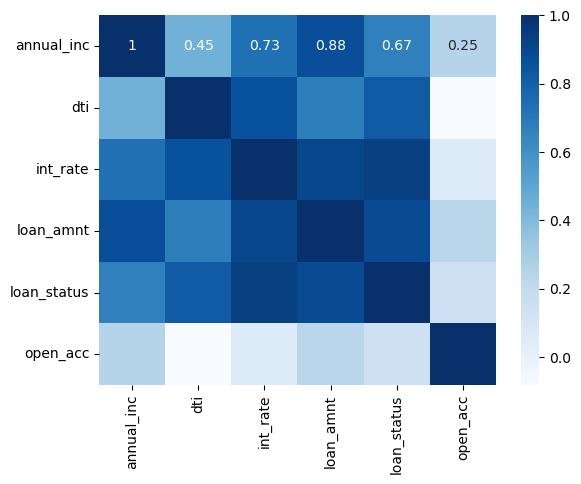

In [226]:
sns.heatmap(count_status.corr(),cmap='Blues', annot = True)
plt.show()

### correlation between number of inquiries and defaults

                inq_last_6mths        id
inq_last_6mths        1.000000 -0.845793
id                   -0.845793  1.000000


<Axes: >

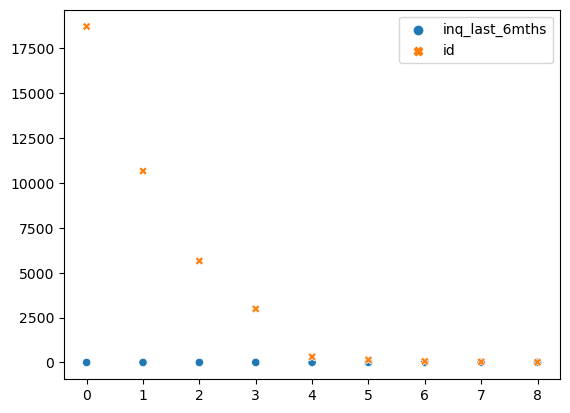

In [17]:
dfLoan3['inq_last_6mths'].value_counts()
print(dfLoan3.groupby(['inq_last_6mths'], as_index=False).count().iloc[:, 0:2].corr())
seaborn.scatterplot(dfLoan3.groupby(['inq_last_6mths'], as_index=False).count().iloc[:, 0:2])

### Correlation between number of open accounts and defaults

          open_acc        id
open_acc  1.000000 -0.772454
id       -0.772454  1.000000


<Axes: >

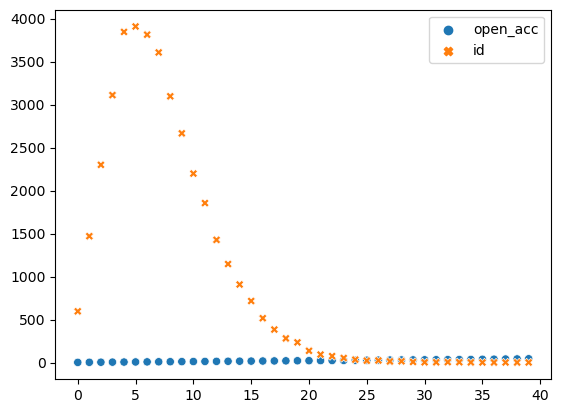

In [18]:
dfLoan3['open_acc'].value_counts()
print(dfLoan3.groupby(['open_acc'], as_index=False).count().iloc[:, 0:2].corr())
seaborn.scatterplot(dfLoan3.groupby(['open_acc'], as_index=False).count().iloc[:, 0:2])